In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from sklearn import preprocessing
import warnings
import statsmodels.api as sm 
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=UserWarning) 

In [3]:
dfs = []
unfilled_cars = []
cnt = 0
cnt1 = 0
cnt2 = 0
files = ['car_data_sorted_LA.csv','car_data_sorted_Chicago.csv','car_data_sorted_Dallas.csv', 'car_data_sorted_Phoenix.csv']
for file in files:   
    df = pd.read_csv(file, na_filter = False)
    #df = pd.read_csv('car_data_sorted_Chicago.csv', na_filter = False)
    #df = pd.read_csv('car_data_sorted_LA1.csv')
    #df2 = pd.read_csv('car_data_sorted_LA2.csv')
    #df3 = pd.read_csv('car_data_sorted_LA3.csv')
    #df_models2 = pd.read_csv('vehicle_models_updated.csv')
    #print(len(df.loc[(df['Year'] != 0) & (df['Make'] != 0) & (df['Model'] != 0) & (df['Model'] != '0')])/len(df))
    df.replace('',np.nan,regex = True, inplace = True)
    #df.dropna(axis=0, inplace = True)    
    dfs.append(df)
    print("Length of 'raw' dataframe: ", len(df))
    
df = pd.concat(dfs, axis = 0,sort=True).reset_index(drop = True)
df = df.loc[(df['Year'] != 0) & (df['Make'] != 0) & (df['Model'] != 0) & (df['Model'] != '0')].reset_index()
for i in range(1,len(df)):
    if not isinstance(df.loc[i,'Color'], str):
        cnt +=1
        df_t = df[(df['Make'] == df.loc[i,['Make']][0]) & (df['Model'] == df.loc[i,['Model']][0])]['Color']
        df_t = df_t[~df_t.isna()]
        try:
            if len(df_t) > 6:
                #print('Color changed to ', df_t.mode()[:1][0])
                cnt1 +=1
                df.loc[i,'Color'] = df_t.mode()[:1][0]
            else:
                raise Exception('Too short')
        except Exception as e: 
                cnt2 +=1
                unfilled_cars.append(str(df.loc[i,['Make']][0])+' '+str(df.loc[i,['Model']][0]))
                pass
            
df.dropna(axis=0, inplace = True)
df['Cylinders'] = pd.to_numeric(df['Cylinders']).astype(int)
# create lower price filter
q_low1 = 900
q_low2 = 1980
# create upper price filter
q_hi1  = df["Price"].quantile(0.95)
print("High price cutoff: ", q_hi1)
q_hi2  = 350000
#q_hi2  = df["Odometer"].quantile(0.98)
q_hi3  = 2024

# filter the data frome
df = df[(df["Price"] < q_hi1) & (df["Price"] > q_low1) & (df["Odometer"] < q_hi2) & (df["Year"] > q_low2) & (df["Year"] < q_hi3)]
df = df.groupby('Make').filter(lambda x : len(x)>11)
df = df.groupby('Model').filter(lambda x : len(x)>5)
df = df[df.Make != '4']
df.drop('index', axis = 1, inplace = True)
print('Overall length of final df: ', len(df))

df['Color'].replace({'Green': 'Other', 'Custom': 'Other','Brown': 'Other', 'Yellow': 'Other'\
                     , 'Orange': 'Other', 'Purple': 'Other','Red': 'Other','Blue': 'Other'}, inplace = True)
df['Transmission'].replace({'Automatic': 1, 'Manual': 0, 'Other': 0}, inplace = True)
df.rename(columns = {'Transmission': 'Transmission_Automatic'}, inplace = True)
df['Condition'].replace({'New': 5, 'Like New': 4, 'Excellent': 3, 'Good': 2, 'Fair': 1, 'Salvage': 0}, inplace = True)


Length of 'raw' dataframe:  6070
Length of 'raw' dataframe:  2363
Length of 'raw' dataframe:  2557
Length of 'raw' dataframe:  4689
High price cutoff:  49995.0
Overall length of final df:  8276


In [7]:
df.shape

(8276, 12)

In [2]:
df = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/car_data_sorted_NY.csv')
print(len(df.loc[(df['Year'] != 0) & (df['Make'] != 0) & (df['Model'] != 0) & (df['Model'] != '0')])/len(df))
# df = df.loc[(df['Year'] != 0) & (df['Make'] != 0) & (df['Model'] != 0) & (df['Model'] != '0')].reset_index()
q_hi3  = df["Year"].quantile(0.98)
df = df[(df["Year"] < q_hi3)]
#df.dropna(axis=0, inplace = True)
#df.dropna(axis=0, inplace = True)

1.0


In [18]:
unfilled_cars = []
cnt = 0
len_df = len(df)
for j,k in zip(['Color'],[5]):
    for i in range(1,len_df):
        if not isinstance(df.loc[i,j], str):
            print('c1')
            df_t = df[(df['Make'] == df.loc[i,['Make']][0]) & (df['Model'] == df.loc[i,['Model']][0])][j]
            df_t = df_t[~df_t.isna()]
            #display(df_t)
            print(len(df_t))
            try:
                if len(df_t) > k:
                    print('c2')
                    print(df_t.mode()[:1][0])
                    df.loc[i,j] = df_t.mode()[:1][0]
                else:
                    raise Exception('Too short')
            except Exception as e: 
                    cnt +=1
                    # print('exception', e)
                    # print(j)
                    # print('len of df_t:', len(df_t))
                    # print(cnt)
                    unfilled_cars.append(str(df.loc[i,['Make']][0])+' '+str(df.loc[i,['Model']][0]))
                    # print(str(df1.loc[i,['Make']][0])+' '+str(df1.loc[i,['Model']][0]))
                    pass

c1
2
c1
3
c1
5
c1
6
c2
Black
c1
0
c1
0
c1
5
c1
13
c2
White
c1
0
c1
13
c2
Grey
c1
6
c2
Black
c1
28
c2
Black
c1
9
c2
White
c1
12
c2
White
c1
0
c1
17
c2
Red
c1
0
c1
13
c2
Grey
c1
0
c1
29
c2
Black
c1
13
c2
White
c1
15
c2
Grey
c1
0
c1
10
c2
Black
c1
30
c2
White
c1
31
c2
White
c1
0
c1
22
c2
White
c1
30
c2
Black
c1
3
c1
1
c1
9
c2
White
c1
0
c1
2
c1
1
c1
31
c2
Black
c1
9
c2
Black
c1
4
c1
26
c2
Grey
c1
1
c1
0
c1
10
c2
White
c1
1
c1
9
c2
Silver
c1
10
c2
White
c1
8
c2
Black
c1
13
c2
Grey
c1
2
c1
6
c2
Black
c1
0
c1
8
c2
Black
c1
20
c2
Black
c1
32
c2
White
c1
12
c2
Black
c1
5
c1
5
c1
8
c2
Black
c1
22
c2
Black
c1
1
c1
17
c2
Grey
c1
13
c2
Black
c1
33
c2
White
c1
19
c2
Silver
c1
3
c1
5
c1
3
c1
10
c2
Black
c1
4
c1
9
c2
Black
c1
13
c2
Blue
c1
5
c1
34
c2
White
c1
10
c2
Silver
c1
32
c2
Black
c1
16
c2
Red
c1
11
c2
White
c1
2
c1
1
c1
11
c2
Black
c1
3
c1
14
c2
White
c1
0
c1
12
c2
Black
c1
1
c1
5
c1
8
c2
Grey
c1
6
c2
Black
c1
14
c2
Grey
c1
0
c1
0
c1
1
c1
0
c1
27
c2
Grey
c1
15
c2
Black
c1
0
c1
0
c1
0
c1
7
c2
B

In [25]:
for i in df1.Make.value_counts()[:10].index.tolist():
    print('----',i)
    print((df1[df1.Make == i]['Paint Color'].value_counts())) 
    for j in df1[df1.Make == i].Model.value_counts()[:10].index.tolist():
        print(j)
        print((df1[(df1.Make == i) & (df1.Model == j)]['Paint Color'].value_counts()))   

---- Ford
White     74
Black     48
Grey      30
Red       26
Blue      24
Silver    23
Brown     10
Green      9
Orange     6
Custom     5
Yellow     4
Name: Paint Color, dtype: int64
F150
Black     11
White     10
Blue       3
Red        2
Silver     2
Custom     1
Green      1
Name: Paint Color, dtype: int64
Mustang
Grey      7
Black     5
White     3
Orange    2
Red       2
Silver    2
Blue      1
Green     1
Yellow    1
Name: Paint Color, dtype: int64
Escape
Silver    4
Black     4
Grey      4
Blue      4
Orange    2
Name: Paint Color, dtype: int64
F250
White     4
Grey      3
Red       3
Black     2
Silver    1
Green     1
Name: Paint Color, dtype: int64
Explorer
Red       4
White     3
Blue      3
Silver    2
Black     2
Brown     1
Green     1
Name: Paint Color, dtype: int64
Transit
White     12
Silver     1
Blue       1
Yellow     1
Black      1
Name: Paint Color, dtype: int64
Fusion
White     4
Black     3
Silver    2
Blue      1
Custom    1
Red       1
Name: Paint Color, dty

In [3]:
####
df = pd.read_csv('car_data_sorted_Full.csv')
####

In [11]:
df_models3 = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/vehicle_models_updated.csv')

In [92]:
df_models3[df_models3.Model == 'Truck']

Make  Model         Class Drive  Cylinders
1202  Mitsubishi  Truck  Pickup Truck   Rwd        4.0
1239      Nissan  Truck  Pickup Truck   Rwd        4.0
1526      Toyota  Truck  Pickup Truck   4Wd        4.0

In [64]:
df2 = pd.read_csv('car_data_sorted_LA2.csv')

In [336]:
df1.Make.value_counts()[:10]

Ford         301
Chevrolet    285
Toyota       134
Honda        131
Nissan       118
Jeep         102
Bmw          100
Dodge         93
Mercedes      91
Volvo         66
Name: Make, dtype: int64

In [19]:
df_models2 = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/vehicle_models_2.csv')
df_models2.rename(columns={"make": "Make", "model": "Model",'drive':"Drive",'cylinders':"Cylinders",\
                          'VClass':"Class"},inplace = True)
df_models2

Make                    Model  \
0                                  Acura              2.2cl/3.0cl   
1                                  Acura              2.3cl/3.0cl   
2                                  Acura                    2.5tl   
3                                  Acura              2.5tl/3.2tl   
4                                  Acura                    3.2cl   
5                                  Acura                    3.2tl   
6                                  Acura                    3.5rl   
7                                  Acura                      Ilx   
8                                  Acura                  Integra   
9                                  Acura                   Legend   
10                                 Acura                      Mdx   
11                                 Acura                      Nsx   
12                                 Acura                      Rdx   
13                                 Acura                       Rl   
14                                 Acura                      Rlx   
15                                 Acura                      Rsx   
16                                 Acura                      Slx   
17                                 Acura                       Tl   
18                                 Acura                      Tlx   
19                                 Acura                      Tsx   
20                                 Acura                    Vigor   
21                                 Acura                      Zdx   
22                            Alfa romeo                      164   
23                            Alfa romeo                       4c   
24                            Alfa romeo                        8   
25                            Alfa romeo                   Giulia   
26                            Alfa romeo                       Gt   
27                            Alfa romeo                      Gtv   
28                            Alfa romeo                   Milano   
29                            Alfa romeo                   Spider   
30                            Alfa romeo                  Stelvio   
31                            Am general                       Dj   
32                            Am general                     Fj8c   
33                            Am general                     Post   
34           American motors corporation                    Eagle   
35                      Asc incorporated                      Gnx   
36                          Aston martin                       Db   
37                          Aston martin                     Db11   
38                          Aston martin                      Db7   
39                          Aston martin                      Db9   
40                          Aston martin                      Dbs   
41                          Aston martin                      Dbx   
42                          Aston martin                  Lagonda   
43                          Aston martin                   Rapide   
44                          Aston martin   Saloon/vantage/volante   
45                          Aston martin                      V12   
46                          Aston martin                       V8   
47                          Aston martin                 Vanquish   
48                          Aston martin                  Vantage   
49                          Aston martin                   Virage   
50                          Aston martin           Virage/volante   
51                                  Audi                      100   
52                                  Audi                      200   
53                                  Audi                     4000   
54                                  Audi                    4000s   
55                                  Audi                     5000   
56                                  Audi                    5000s   
57                                

In [24]:
df3 = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/car_data_sorted.csv')
df3[df3.Odometer == 130000][['Make','Model','Cylinders','Drive','Odometer']]

Make     Model  Cylinders Drive  Odometer
67    Chevrolet  Traverse        6.0   4Wd    130000
116     Cadilla    Alante        8.0   Rwd    130000
131       Dodge   Charger        8.0   Rwd    130000
211   Chevrolet   Express        8.0   4Wd    130000
222   Chevrolet  Traverse        6.0   4Wd    130000
704   Chevrolet   Express        8.0   Rwd    130000
735        Ford      F150        8.0   4Wd    130000
834      Subaru    Legacy        4.0   4Wd    130000
913        Ford      F150        8.0   4Wd    130000
1012    Lincoln       Mkz        6.0   Fwd    130000
1093        Gmc     Envoy        6.0   4Wd    130000
1165  Chevrolet   Express        8.0   Fwd    130000
1176    Hyundai     Santa        6.0   Fwd    130000
1286   Infiniti      Ex37        4.0   4Wd    130000
1376   Cadillac       Cts        6.0   4Wd    130000
1447       Ford      Edge        6.0   Fwd    130000
1596  Chevrolet      2500        8.0   4Wd    130000
1650      Honda     Pilot        6.0   4Wd    130000
1711        Kia   Sorento        6.0   Fwd    130000
1796       Jeep  Wrangler        6.0   4Wd    130000
1804  Chevrolet    Camaro        6.0   Rwd    130000
1806      Honda   Odyssey        6.0   Fwd    130000
1839        Bmw      325I        4.0   Rwd    130000
1875     Nissan    Altima        6.0   Fwd    130000
1901     Saturn     Acura        NaN   NaN    130000
2048       Ford  Explorer        6.0   4Wd    130000
2096   Mercedes     Sl500        8.0   Rwd    130000

In [25]:
df3

Year           Make          Model  Condition   Color  Odometer  \
0     2010           Ford           F150       Good    Blue    114000   
1     2019            Ram      Promaster   Like New  Yellow     26000   
2     2014          Volvo            Vnl       Good   White    650000   
3     2006           Ford         Escape       Good  Silver    101003   
4     2008          Honda          Civic       Good    Blue    130271   
5     2015           Jeep        Patriot   Like New   Black    106000   
6     2006      Chevrolet          Tahoe       Fair   Black    148000   
7     2004       Cadillac        Deville  Excellent   Black    134673   
8     2014        Hyundai       Veloster  Excellent    Blue     82000   
9     2010         Jaguar             Xf  Excellent     NaN    100561   
10    2012       Cadillac            Cts  Excellent  Silver     92000   
11    2000            Gmc         Sierra       Good     Red    182401   
12    2015      Chevrolet      Silverado  Excellent   Black    150000   
13    2013           Ford           F550  Excellent   White     54000   
14    2011           Land          Rover       Good    Grey    110500   
15    2015            Gmc         Acadia  Excellent     NaN     90000   
16    2018       Cadillac            Xt5  Excellent   White     60300   
17    2000           Ford     Expedition  Excellent     NaN    160000   
18    2000          Honda          S2000  Excellent    Grey     82000   
19    2009            Gmc          Yukon  Excellent   Black    170000   
20    2008         Toyota            Rav       Good   White    206000   
21    2010          Honda          Civic  Excellent    Blue    152000   
22    2014         Nissan          Nv200  Excellent    Blue    120345   
23    2016         Subaru        Outback   Like New   White     55000   
24    1993       Cadillac        Deville       Good   Brown     76000   
25    2008       Chrysler           Town  Excellent  Silver    115600   
26    2017   Freightliner       Cascadia  Excellent    Blue    661769   
27    2004          Lexus          Gx470       Good   Black    125000   
28    2005         Subaru       Forester       Fair  Silver    205000   
29    2007      Chevrolet      Silverado       Good   Black    194000   
30    2018           Audi             Q7  Excellent   Black     29500   
31    2011            Kia          Forte  Excellent  Silver     99453   
32    4300          Truck  International       Good     NaN    175000   
33    2008         Nissan         Altima       Fair   White    232976   
34    2008        Hyundai          Santa       Good   White    167000   
35    2006            Bmw             X3  Excellent   Black    188000   
36    2005         Toyota        Corolla       Fair  Silver     86293   
37    2007         Toyota           Rav4       Good   White    120000   
38    2015      Chevrolet           Volt  Excellent     NaN     64000   
39    2011      Chevrolet      Avalanche       Good   White    125000   
40    2003         Toyota        Corolla       Good   Black    125650   
41    2011            Kia           Rio5       Good     Red    146712   
42    2013           Ford          Focus       Good   Black    117827   
43    2010     Volkswagen          Jetta   Like New   Black     54000   
44    2001           Ford       Explorer       Fair     Red    260502   
45    1996      Peterbilt            379       Good     NaN         0   
46    2015       Mercedes            S63        New   White     57200   
47    2014          Lexus             Is       Good   White     76000   
48    2014           Ford           F250  Excellent   White    170000   
49    2006          Grand            Pix       Good    Grey    200000   
50    2009           Ford         Escape       Good   Black    175745   
51    1969        Pontiac       Firebird  Excellent    Blue    136300   
52    1993      Chevorlet         Camaro  Excellent   Green     82000   
53    2006          Dodge        Sprinte       Fair   White    2

In [322]:
l = [0,1,2]

In [26]:
len(df3)

2105

In [326]:
l[2:4]

[2]

In [313]:
df1[df1.Make == 'Mercedes']

index                           Vehicle info  \
50       66                  2015 Mercedes S63 Amg   
78      105  2007 Mercedes Benz E550 4 Matic Sedan   
180     228               2011 Mercedes Benz Gl450   
185     234               2005 Mercedes Benz Ml350   
191     243           2008 Mercedes Benz Ml320 Cdi   
217     273                2017 Mercedes Benz C300   
274     340  2007 Mercedes Benz E350 4 Matic Sedan   
299     376                                      ~   
317     396       2011 Mercedes Benz Sprinter 2500   
334     416                2009 Mercedes Benz E350   
423     528         2008 Mercedes Benz R350 4Matic   
444     557                1995 Mercedes Benz S350   
460     576            2013 Mercedes Sprinter 3500   
480     599                                      ~   
541     676                     2005 Mercedes C240   
586     732                2008 Mercedes E350M Awd   
642     805                                      ~   
669     838                 2016 Mercedes Sprinter   
670     839                2008 Mercedes Benz E350   
675     847               1981 Mercedes Benz 380Sl   
699     877                1972 Mercedes Benz 250C   
700     878               1972 Mercedes Benz 280Se   
709     887               2008 Mercedes Benz Ml350   
732     916                          1979 Mercedes   
787     979               2008 Mercedes Benz Gl550   
843    1041               1974 Mercedes Benz 450Sl   
850    1049         2008 Mercedes Benz S550 4Matic   
851    1051                                      ~   
877    1087                                      ~   
885    1097                    2010 Mercedes G 550   
898    1110               2006 Mercedes Benz Ml350   
904    1116                          2014 Mercedes   
950    1165                2015 Mercedes Benz S550   
971    1192                                      ~   
999    1227             2006 Mercedes Benz Slk 280   
1002   1230                2012 Mercedes Benz E350   
1039   1274                                      ~   
1051   1286          2003 Mercedes C230 Kompressor   
1087   1328                2016 Mercedes Benz E350   
1155   1410         2013 Mercedes Benz S550 4Matic   
1183   1439    2017 Mercedes Benz Metris Cargo 3Dr   
1200   1460                                      ~   
1249   1516                                      ~   
1259   1527                     2004 Mercedes S500   
1295   1564                2013 Mercedes Benz S550   
1303   1572     2015 Mercedes Benz Gla 250 4 Matic   
1306   1575                2003 Mercedes Benz E500   
1359   1634    2014 Mercedes Benz E350 Convertible   
1400   1683              2017 Mercedes Benz Glc300   
1407   1693  2014 Mercedes Benz Sprinter Cargo Van   
1431   1722              1983 Mercedes Benz 380 Sl   
1508   1808                2002 Mercedes Benz E320   
1545   1854                                      ~   
1552   1861                     2005 Mercedes E320   
1557   1866          2017 Mercedes Benz Amg Gle 43   
1562   1874                                      ~   
1563   1875                                      ~   
1579   1892                1993 Mercedes Benz 400E   
1602   1917                2012 Mercedes Benz S550   
1604   1920                                      ~   
1607   1923                2015 Mercedes Benz C300   
1620   1936                     2007 Mercedes Benz   
1627   1943                                      ~   
1629   1947      2002 Mercedes Benz Sl500 Roadster   
1664   1984                  2010 Mercedes E63 Amg   
1696   2018            2012 Mercedes Benz Sprinter   
1746   2078       2012 Mercedes Benz Sprinter 3500   
1762   2095             1984 Mercedes Benz 500 Sec   
1810   2154              1985 Mercedes 300Cd 300Td   
1887   2238             2003 Mercedes Benz Clk 320   
1896   2247             2015 Mercedes Benz Cla 250   
1936   2292                2002 Mercedes Benz E320   
1944   2300                                      ~   
1948   230

In [254]:
for i in range(len(df1)):
     if df1.loc[i,'Vehicle info'] != '~':
            if df1['Vehicle info'][i].split(' ')[1] == 'Ford' and df1['Vehicle info'][i].split(' ')[2] == 'F':
                print(''.join(df1['Vehicle info'][i].split(' ')[2:4]))

F250
F150
F150
F150
F150
F150


IndexError: list index out of range

In [207]:
df1 = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/car_data.csv')

In [194]:
df1[['Make','Model','Cylinders','Drive','Odometer']].head()

Make    Model  Cylinders Drive  Odometer
0     Dodge      Ram        6.0   Rwd    256000
1  Mercedes     Benz        6.0   Rwd    265000
2      Ford  Mustang        NaN   NaN     89000
3      Ford        F        NaN   NaN    130000
4     Honda  Odyssey        6.0   Fwd     84532

We are getting rid of all the samples that don't have complete 'Year', 'Make', and 'Model' information as we can't use that data in our model.

Fortunately, it appears as we have 92-95% of our original data after doing this. 

## Missing Values

Note: We can disregard "Year", "Make", and "Model", as we have filtered those out already. We will also drop all the samples where the "Condition" variable is missing (around 15% of the dataset). 

Before dropping:

In [14]:
df_old = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/car_data_sorted_1.csv')

tot = len(df_old)
for i in ['Paint Color', 'Cylinders','Drive']:
    print('Percent with not null Condition and null ' + i + ': ' + str(round(100*df_old[(df_old["Condition"].notnull()) & (df_old[i].isnull()) ].shape[0]/tot,2))+ '%')
    print('Percent with null Condition and null ' + i + ': ' + str(round(100*df_old[(df_old["Condition"].isnull()) & (df_old[i].isnull()) ].shape[0]/tot,2))+ '%')

Percent with not null Condition and null Paint Color: 12.79%
Percent with null Condition and null Paint Color: 12.58%
Percent with not null Condition and null Cylinders: 13.91%
Percent with null Condition and null Cylinders: 12.14%
Percent with not null Condition and null Drive: 17.53%
Percent with null Condition and null Drive: 13.05%


It so happens that samples with that feature missing also have other features missing, which works in our favor. After dropping:

So we still have to take care of "Drive", "Paint Color", and "Cylinders".

To handle the remaining missing values, we will use imputation. But first, we will convert some of these categorical variables to numerical. Note: We are going to keep the missing value as "NaN" for now, and impute them using KNN imputer.

The categorical variables we are going to use in our model are: "Make", "Model", "Condition", "Paint Color", "Title Status", "Drive", and "Transmission". 

In [52]:
# features = ["Make","Model","Condition", "Paint Color", "Title Status", "Drive", "Transmission"]
# dft = df.copy()
# dft = dft.loc[:,features]
# dft[pd.isnull(dft)]  = 'NaN'
# dft.replace({'Condition':{'New': 0,'Excellent':1,'Like New':2,'Good':3, 'Fair': 4, 'Salvage': 5}},inplace=True)
# dft.replace({'Drive':{'Rwd': 0,'Fwd':1,'Like New':2,'4Wd':3, 'NaN': 'NaN'}},inplace=True)
# dft.replace({'Paint Color':{'Black': 0,'White':1,'Silver':2,'Grey':3, 'Blue':4,'Red': 5,'Green':6,\
#                             'Brown': 7,'Yellow': 8, 'Purple': 9, 'Orange': 10, 'Custom':11, 'NaN': 'NaN'}},inplace=True)
# dft.replace({'Transmission':{'Automatic': 0,'Manual':1,'Other':2}},inplace=True)
# dft.replace({'Title Status':{'Clean': 0,'Rebuilt':1,'Lien':2,'Missing':3, 'Parts Only': 4,'Salvage': 5}},inplace=True)
# # label_encoder = preprocessing.LabelEncoder()
# # for i in features:
# #     dft[i]= label_encoder.fit_transform(df[i])
# dft.head()

Condition Paint Color  Title Status Drive  Transmission
0          3           5             0     0             1
1          3           0             0     0             0
2          1           2             0   NaN             0
3          1         NaN             0   NaN             0
4          1           2             0     1             0

In [2]:
df = pd.read_csv('car_data_sorted_Full.csv')

In [24]:
df = pd.read_csv('df_latest.csv')

## EDA

Sample size: 34,430


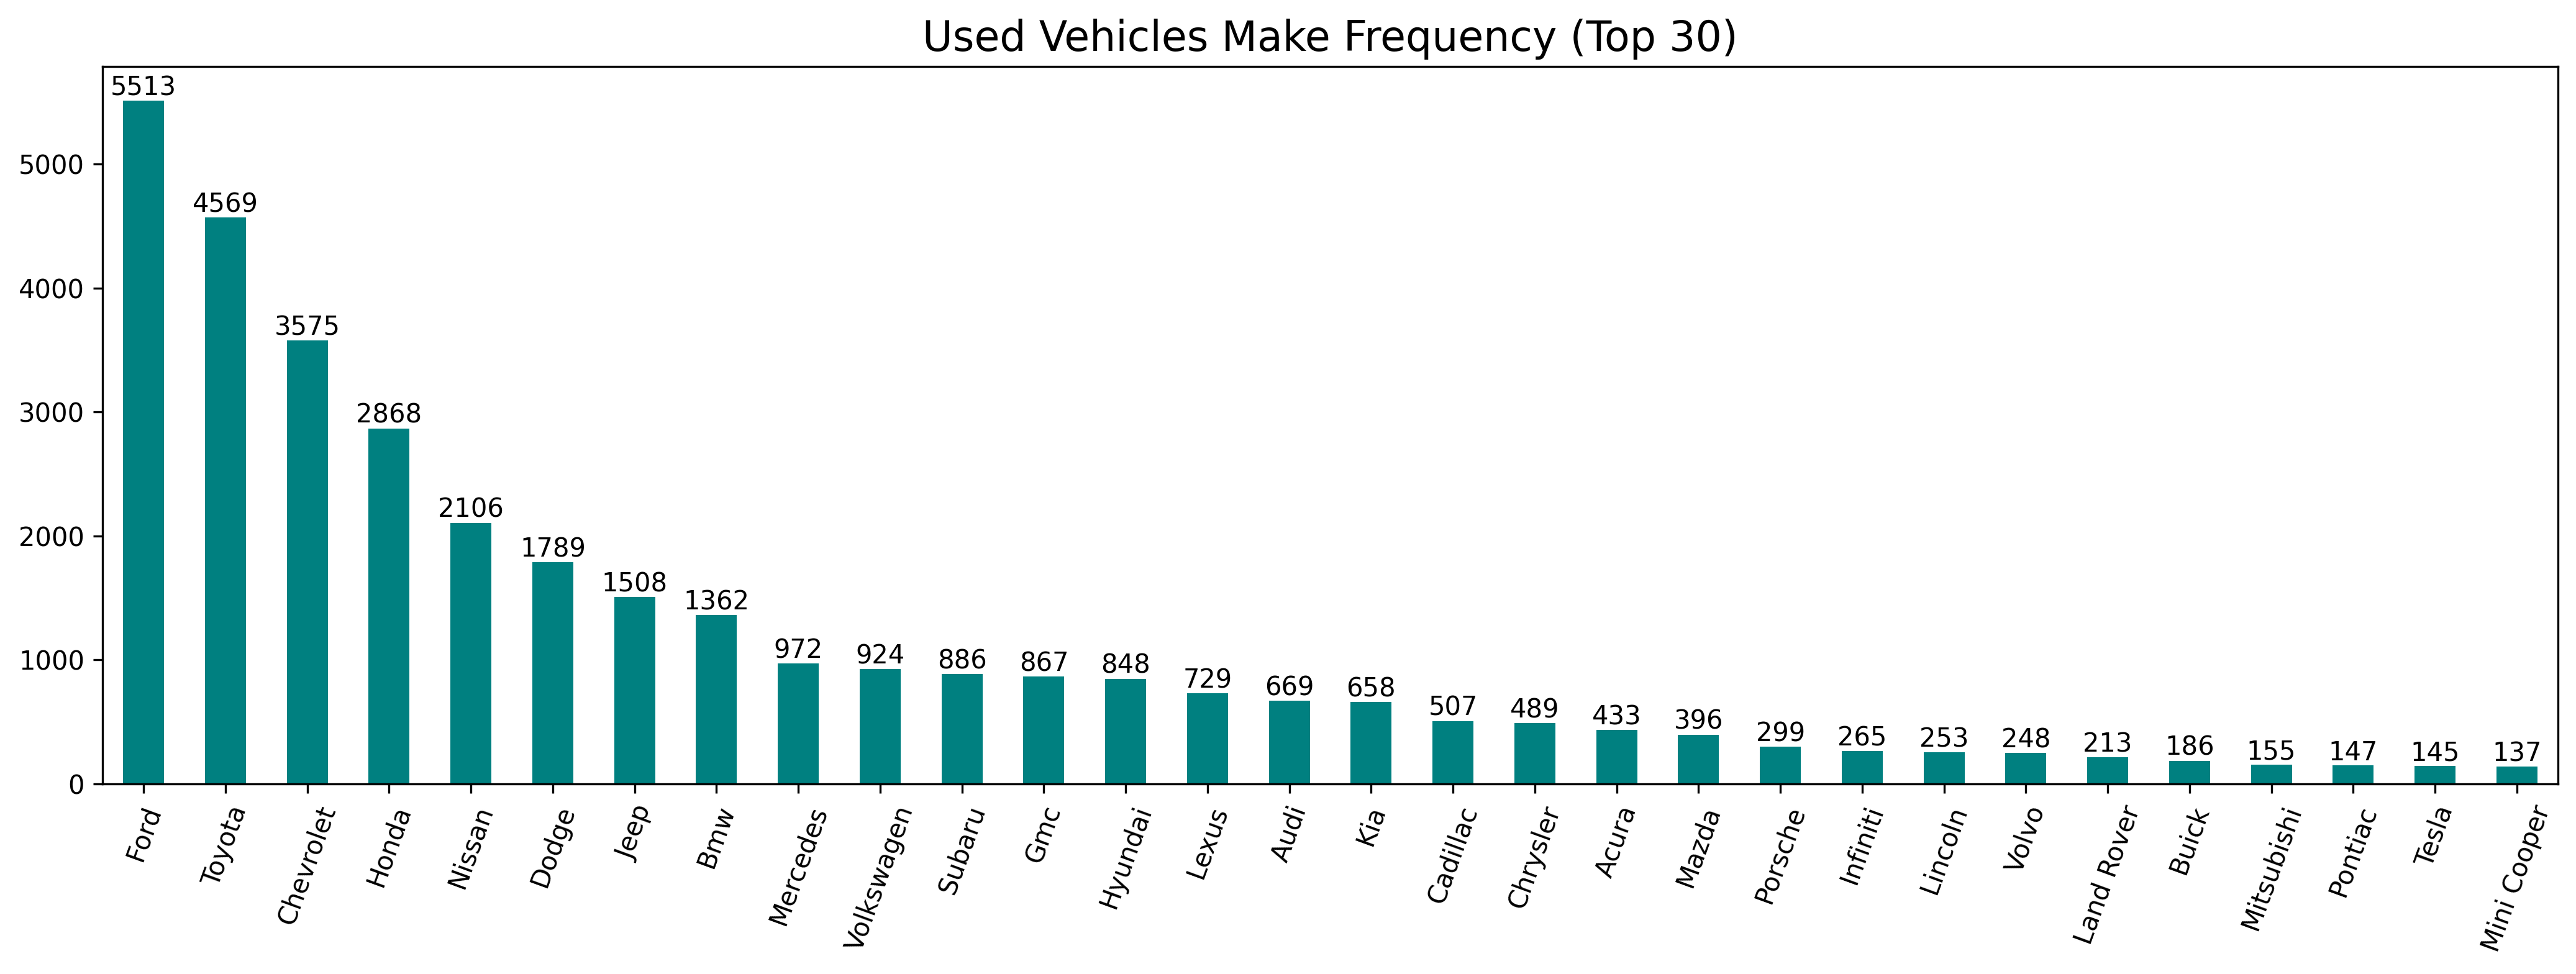

In [25]:
plt.figure(figsize = [17,5],dpi = 300)
ax = df['Make'].value_counts()[:30].plot(kind='bar', color = 'teal');
for bars in ax.containers:
    ax.bar_label(bars);
plt.xticks(rotation=70);
print("Sample size: " + str('{:,}'.format(len(df))))
plt.title("Used Vehicles Make Frequency (Top 30)", fontsize = 16);

In [9]:
df.head()

Color Condition  Cylinders  \
0  White      Good        4.0   
1    Red  Like New        8.0   
2  Green  Like New        8.0   
3  White      Good        8.0   
4  White  Like New        8.0   

                                         Description Drive Fuel        Make  \
0  Quick and fun 2 door 6 speed manual transmissi...   Fwd  Gas  Volkswagen   
1  1969 Dodge Charger R/T Tribute 440/492 hp 727 ...   Rwd  Gas       Dodge   
2  1969 Plymouth GTX, Lime Green, Black Stripes, ...   Rwd  Gas    Plymouth   
3  Gorgeous 2006 Hummer H2 SUT, White with Black ...   4Wd  Gas      Hummer   
4  2018 Mercedes Benz GLE 43 AMG White with Camel...   4Wd  Gas    Mercedes   

     Model  Odometer   Price Title Status Transmission  Year  
0      Gti  151700.0    6500        Clean       Manual  2010  
1  Charger      88.0  179990        Clean    Automatic  1969  
2      Gtx   19000.0  149990        Clean    Automatic  1969  
3       H2  125000.0   29990        Clean    Automatic  2006  
4      Gle   34000.0   54990        Clean    Automatic  2018

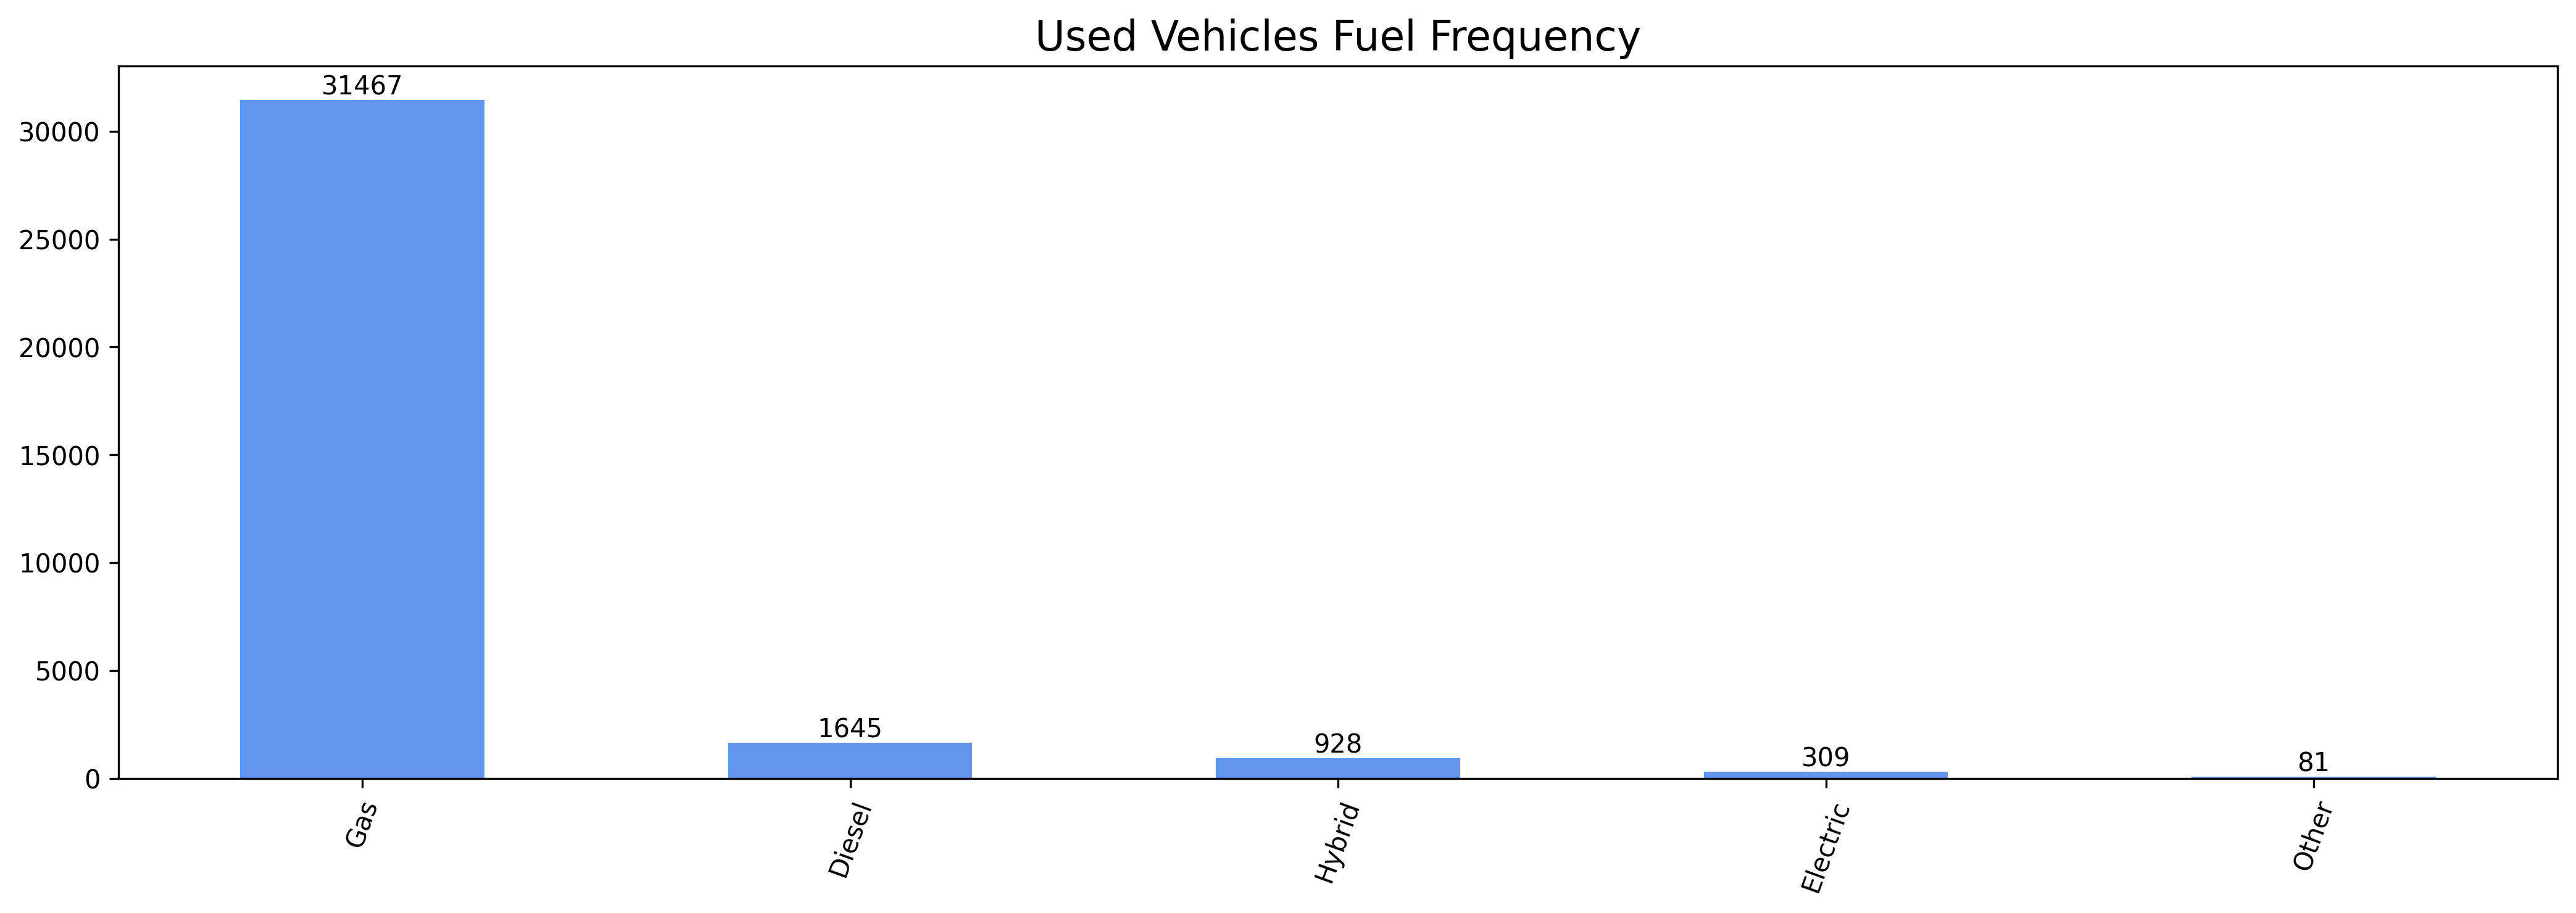

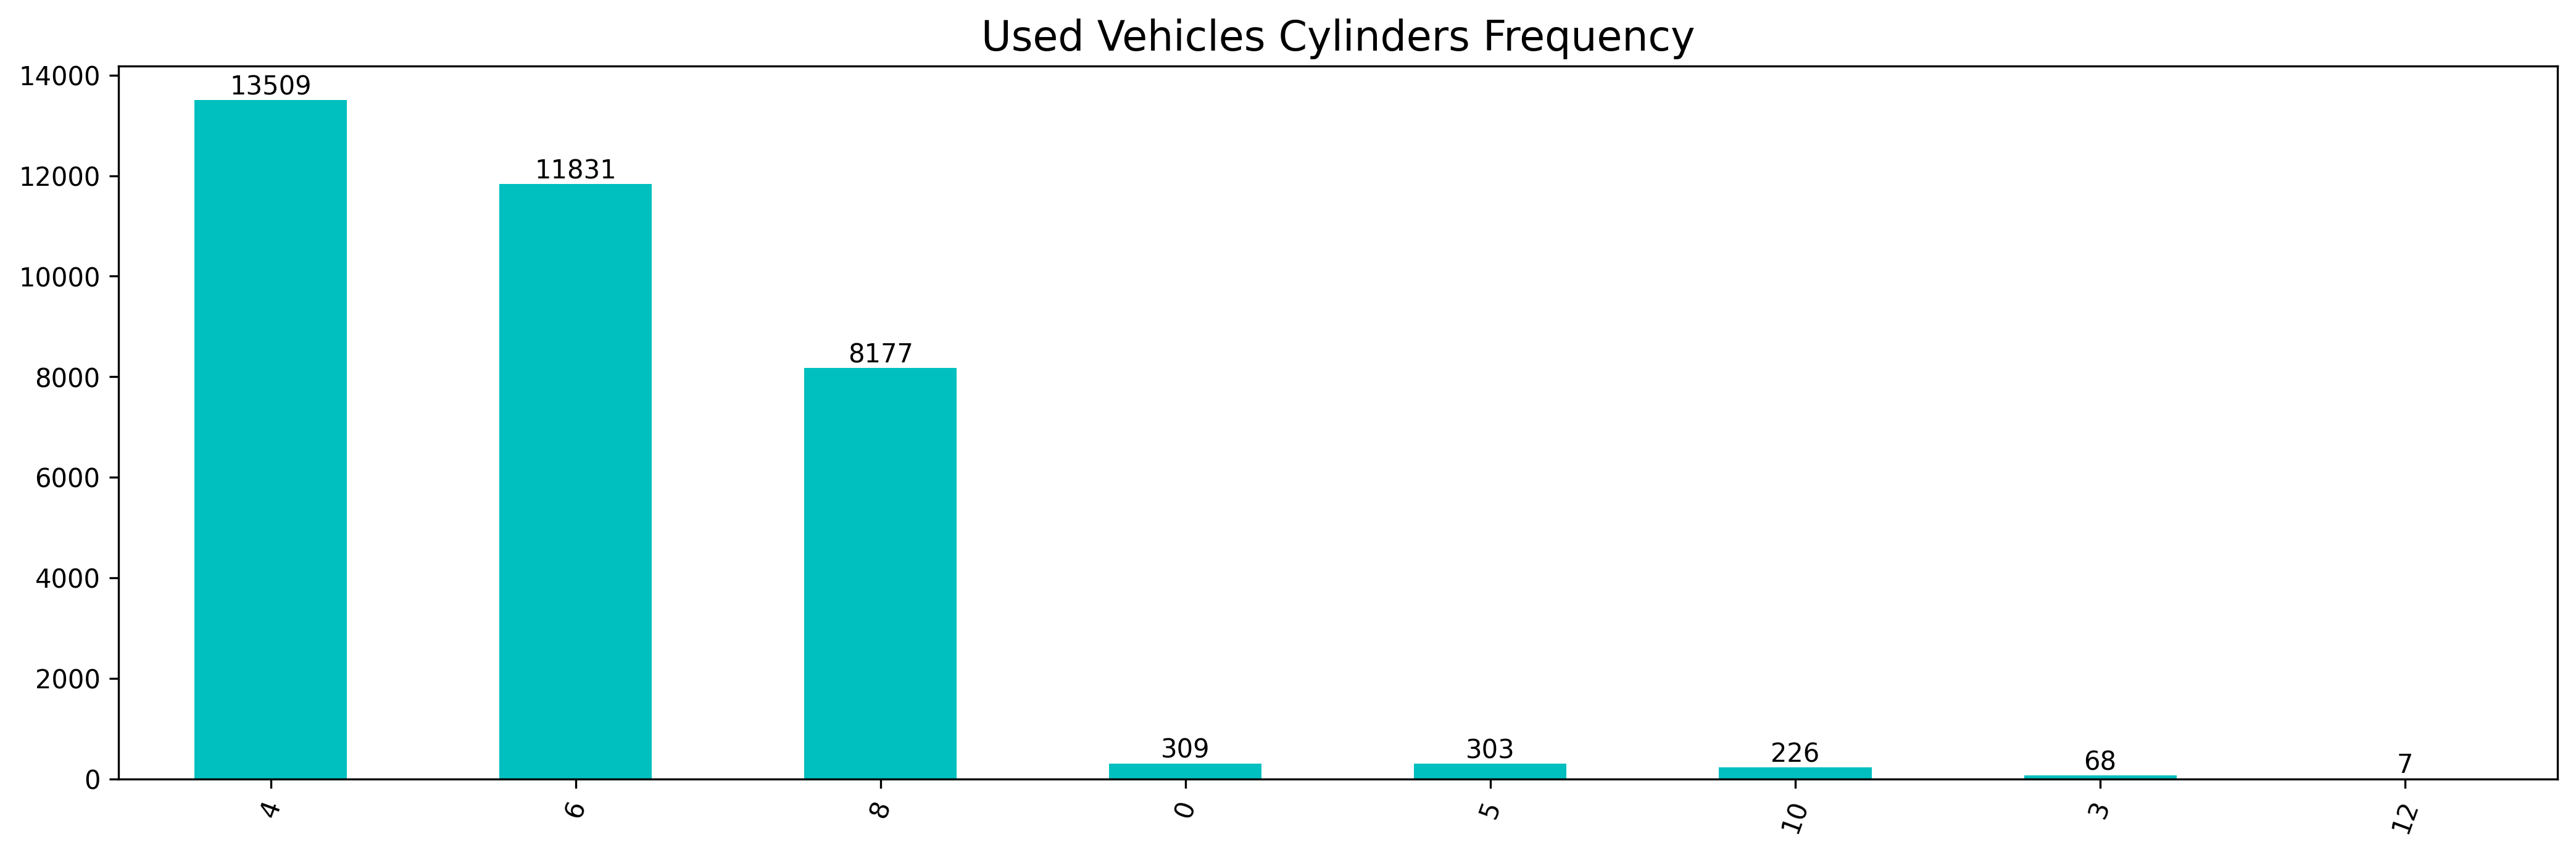

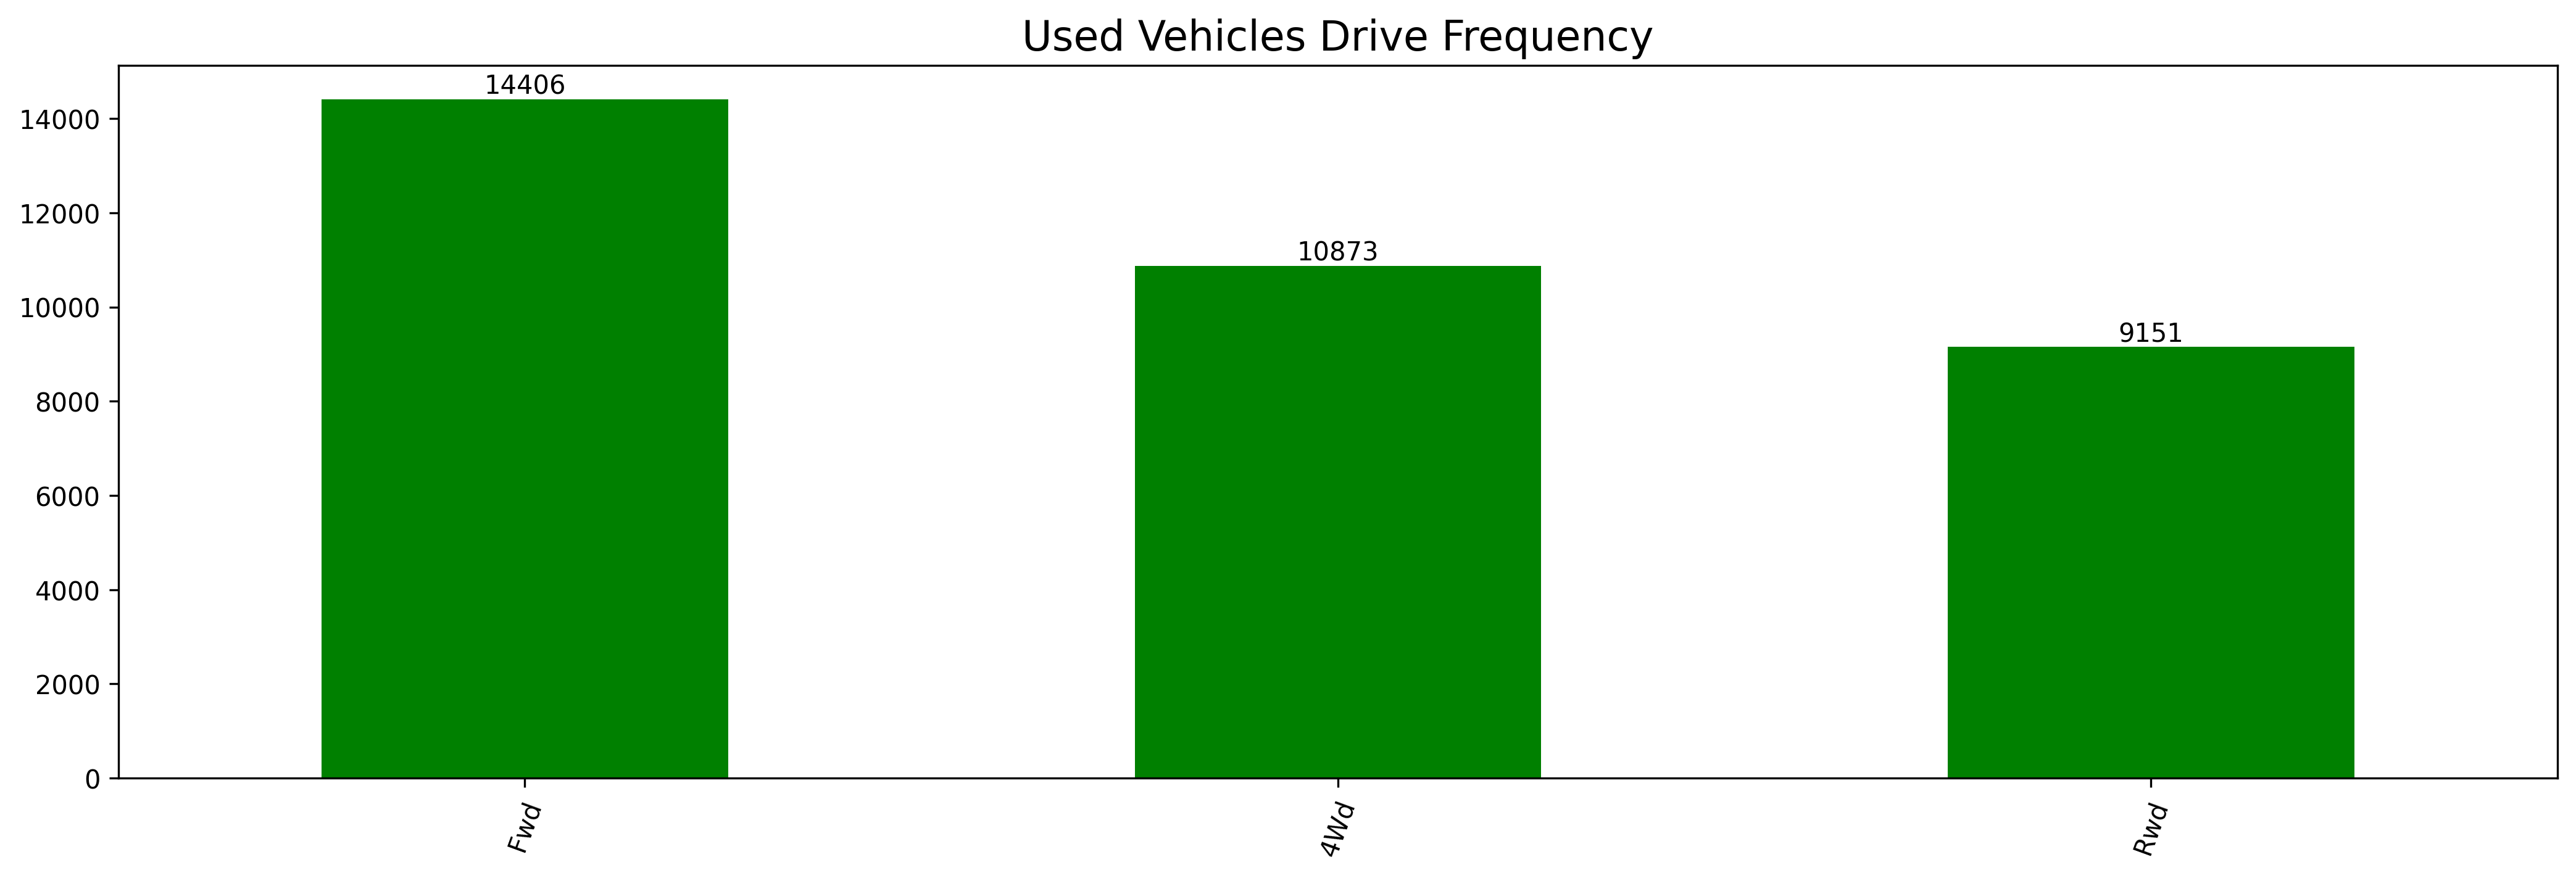

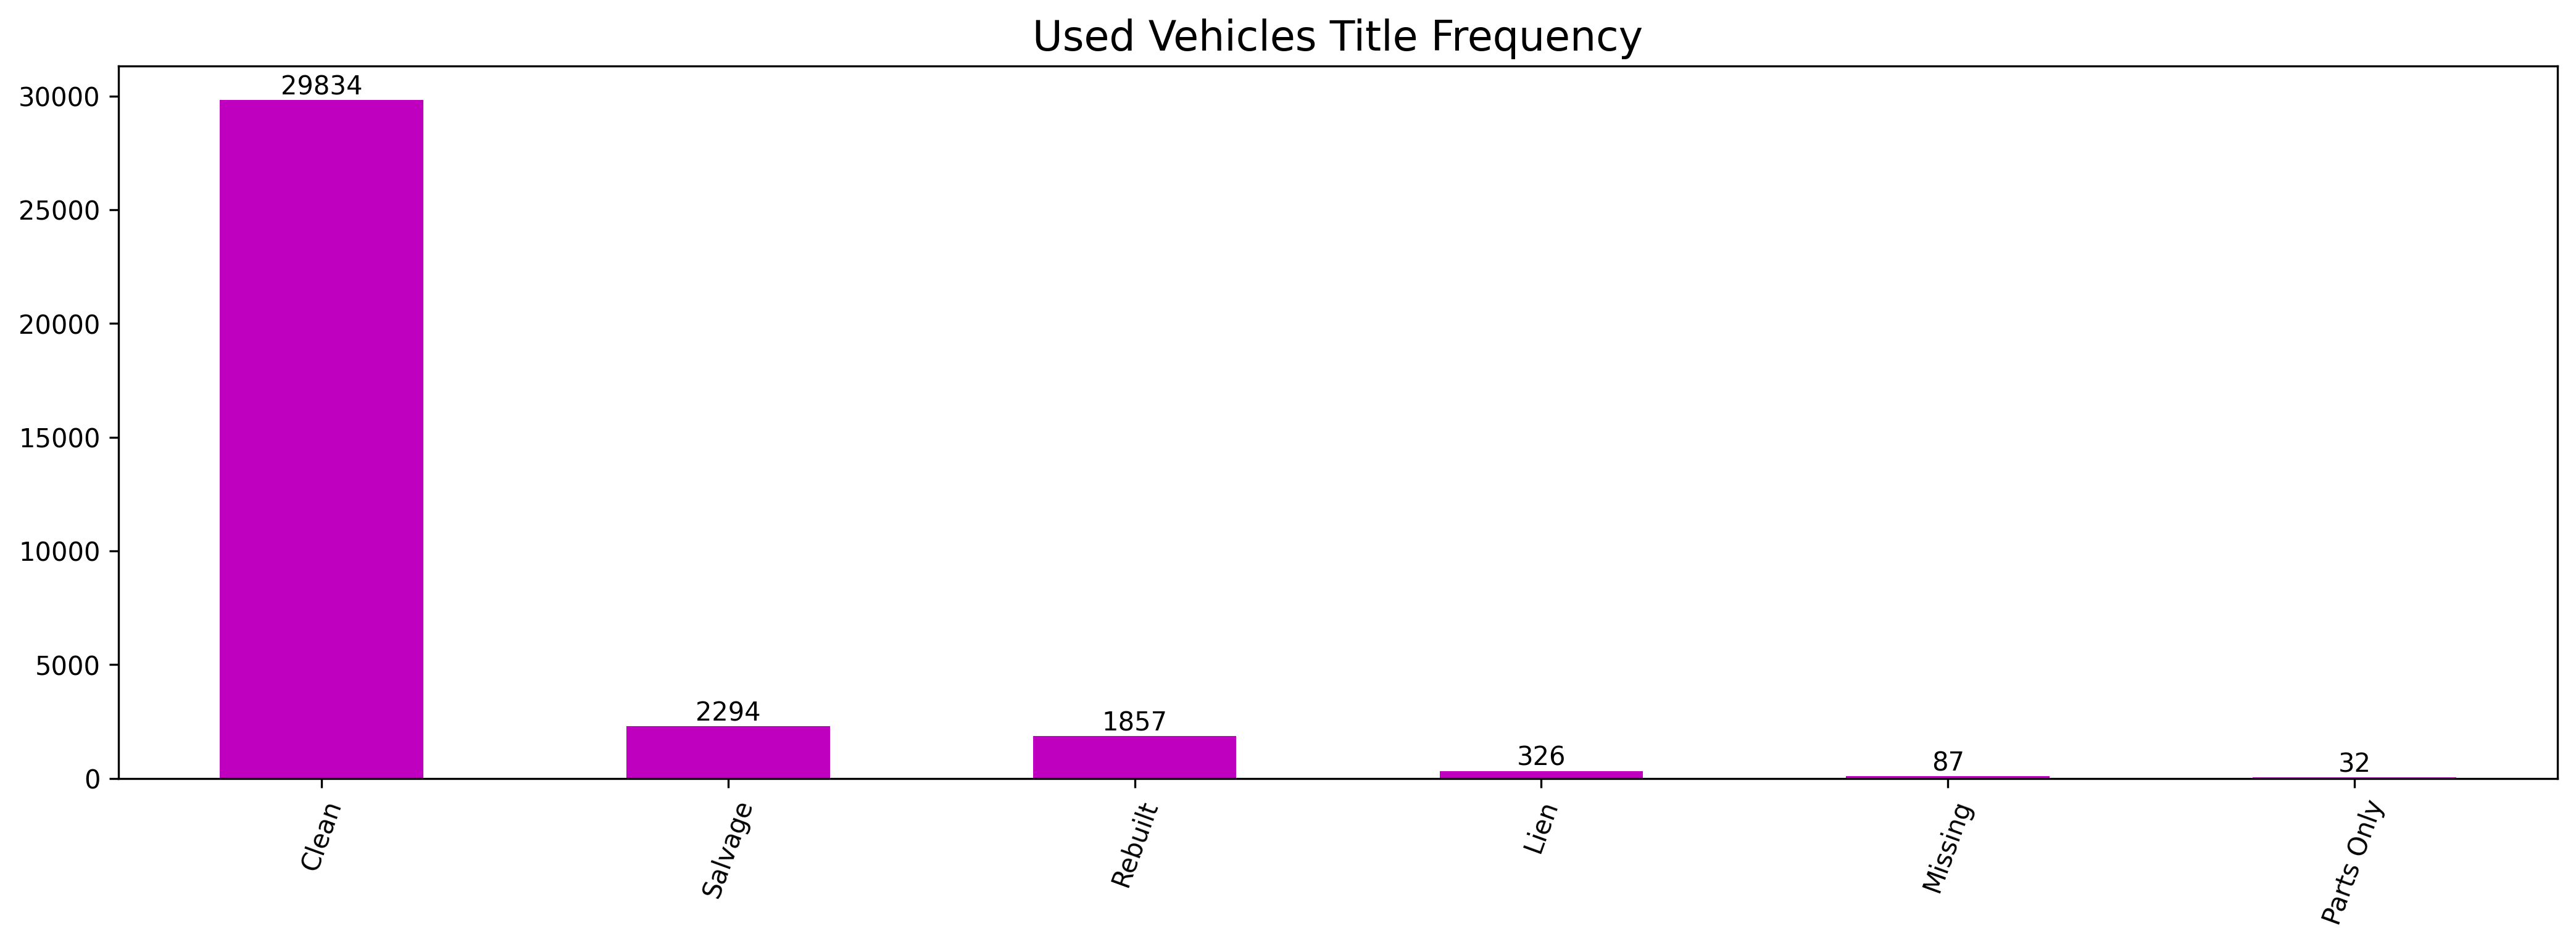

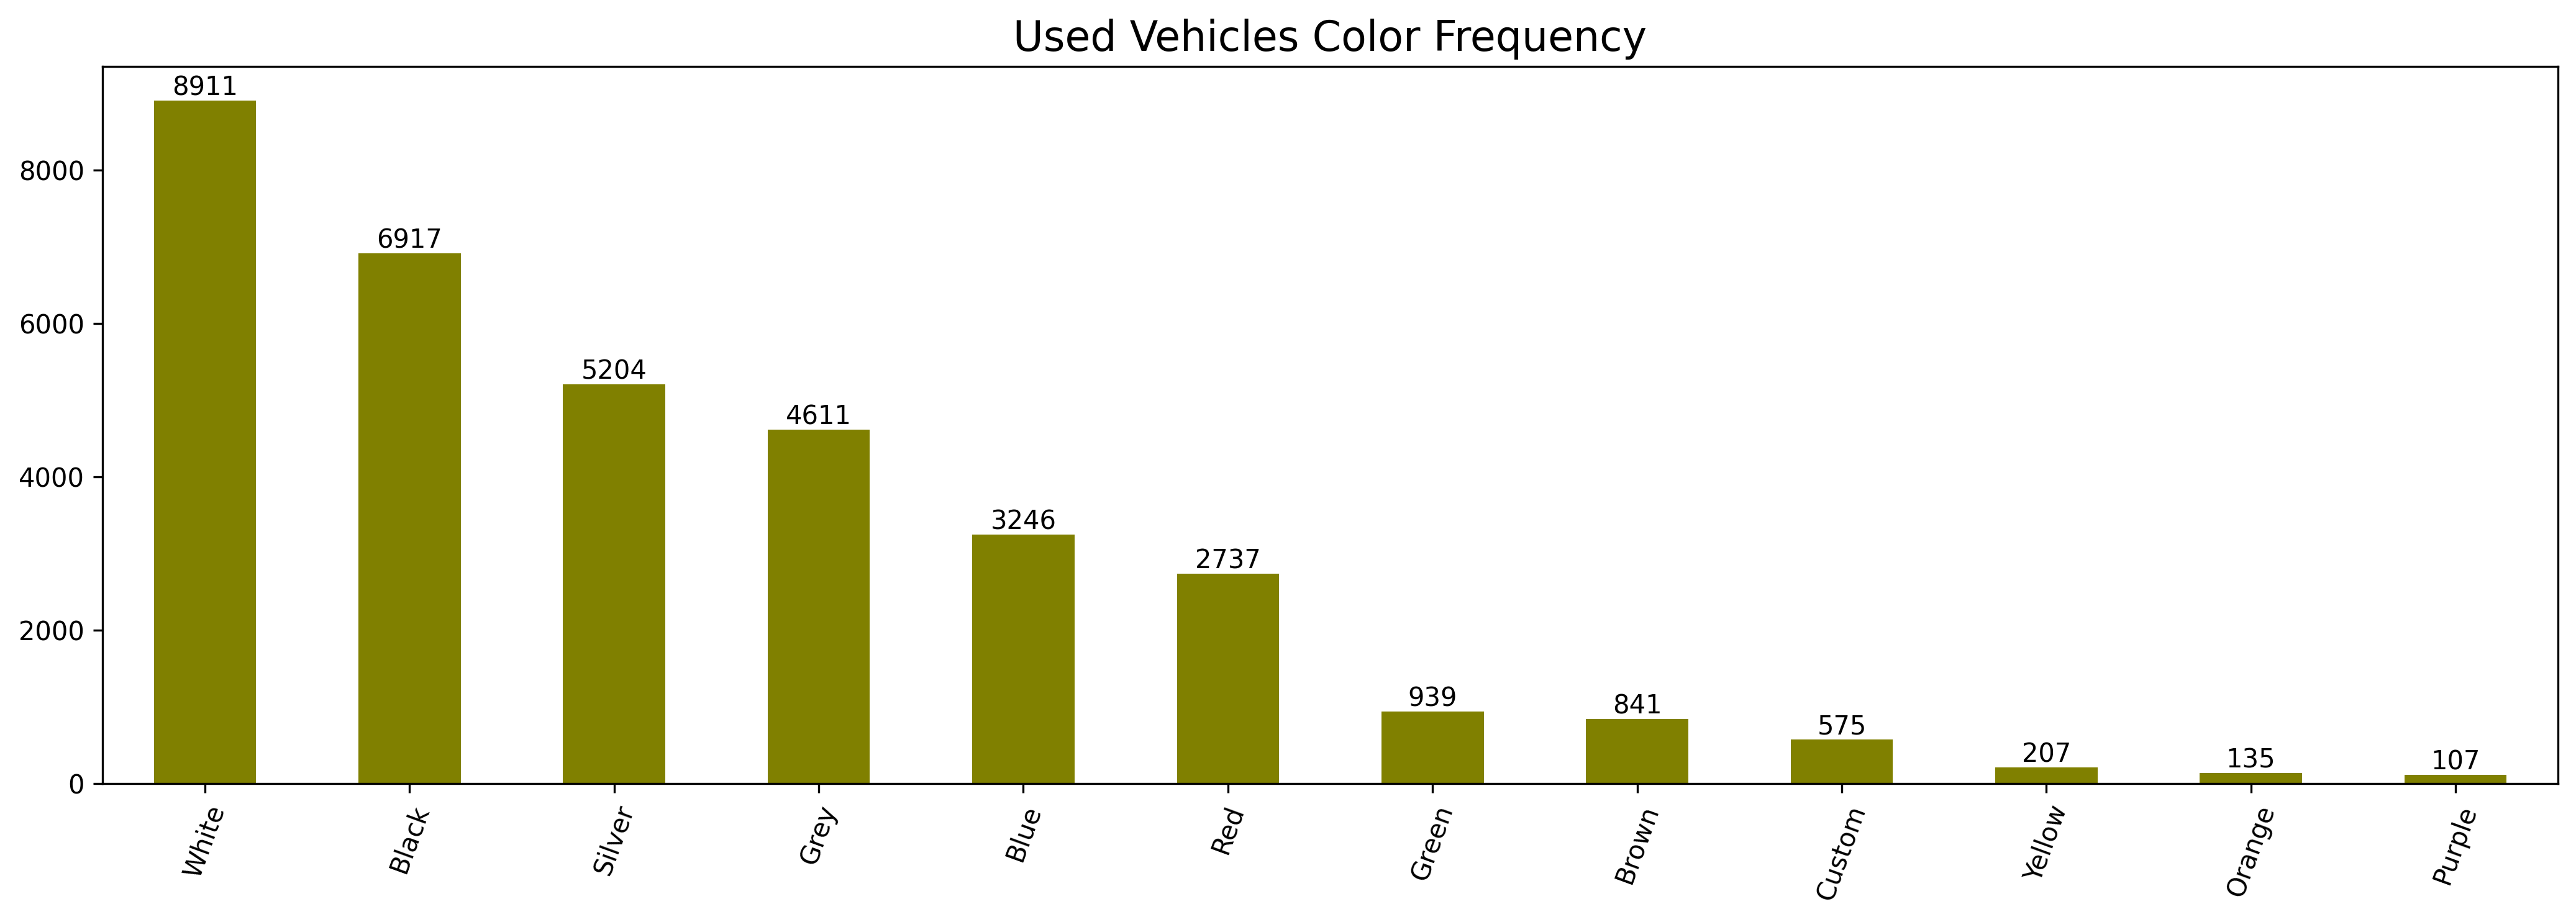

In [27]:
categories = ['Fuel','Cylinders','Drive','Title', 'Color']
colors = ['cornflowerblue', 'c', 'g','m','olive','chocolate']
for category, color in zip(categories, colors):
    plt.figure(figsize = [17,5],dpi = 300)
    ax = df[category].value_counts().plot(kind='bar', color = color);
    for bars in ax.containers:
        ax.bar_label(bars);
    plt.xticks(rotation=70);
    plt.title("Used Vehicles " + category + " Frequency", fontsize = 16);

In [30]:
df.Year.min()

1984

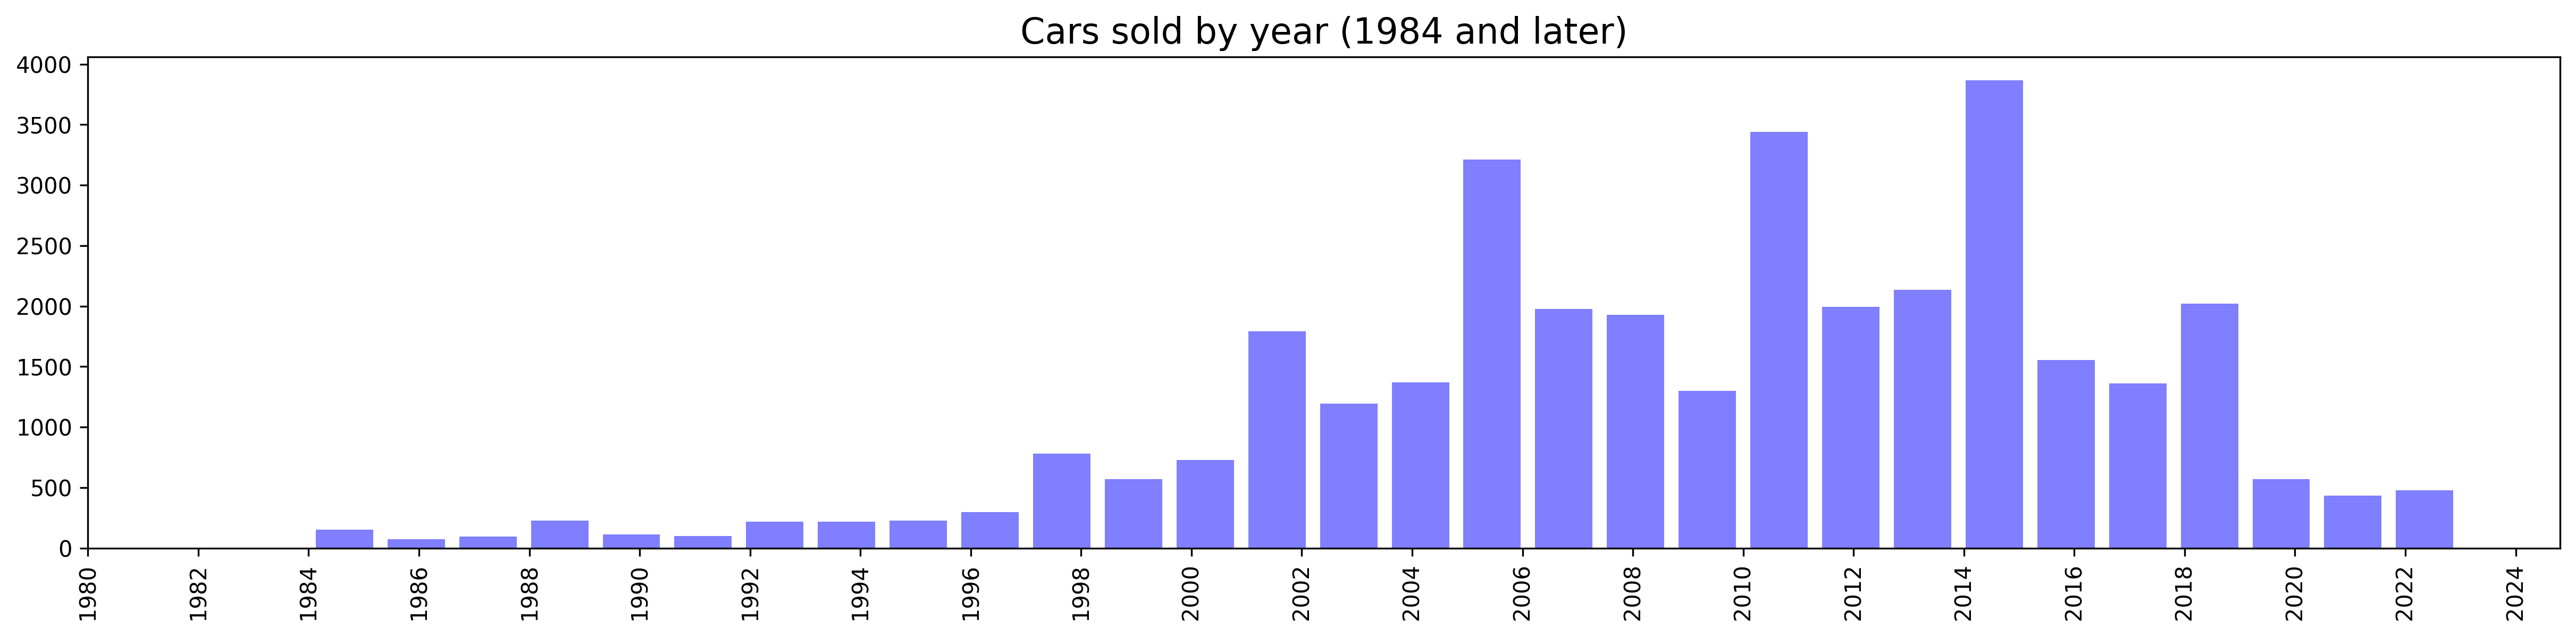

In [32]:
fig, ax = plt.subplots(1,1,figsize=(20,4), dpi = 300)
histogram = plt.hist(df['Year'].sort_values(),bins = 30, rwidth=0.8,facecolor='blue', alpha=0.5)
histogram = plt.xticks(ticks = np.arange(1980,2026,2),rotation = 90)
plt.title('Cars sold by year (1984 and later)', loc = 'center', fontsize = 16);

In [16]:
dft = df.groupby('Condition')
for name, group in dft:
     print(name,group)

Excellent      Year          Make         Model  Price  Condition  Odometer Paint Color  \
2    2010          Ford       Mustang  16000  Excellent     89000      Silver   
3    2012          Ford             F  27000  Excellent    130000         NaN   
4    2010         Honda       Odyssey   7950  Excellent     84532      Silver   
5    2015      Cadillac      Escalade  34900  Excellent     83443       Brown   
6    2008           Bmw            M3  24000  Excellent     85000       White   
8    2016         Dodge         Grand   6500  Excellent    137000      Silver   
9    2010           Bmw            X3   7900  Excellent    114833       Black   
12   2007          Ford     Econoline   4600  Excellent    112000         NaN   
13   2014    Volkswagen         Jetta   7700  Excellent    119057        Grey   
15   2011           Gmc        Acadia   7900  Excellent    135031      Silver   
16   2007         Volvo           S60   4300  Excellent    150970      Silver   
17   2011        N

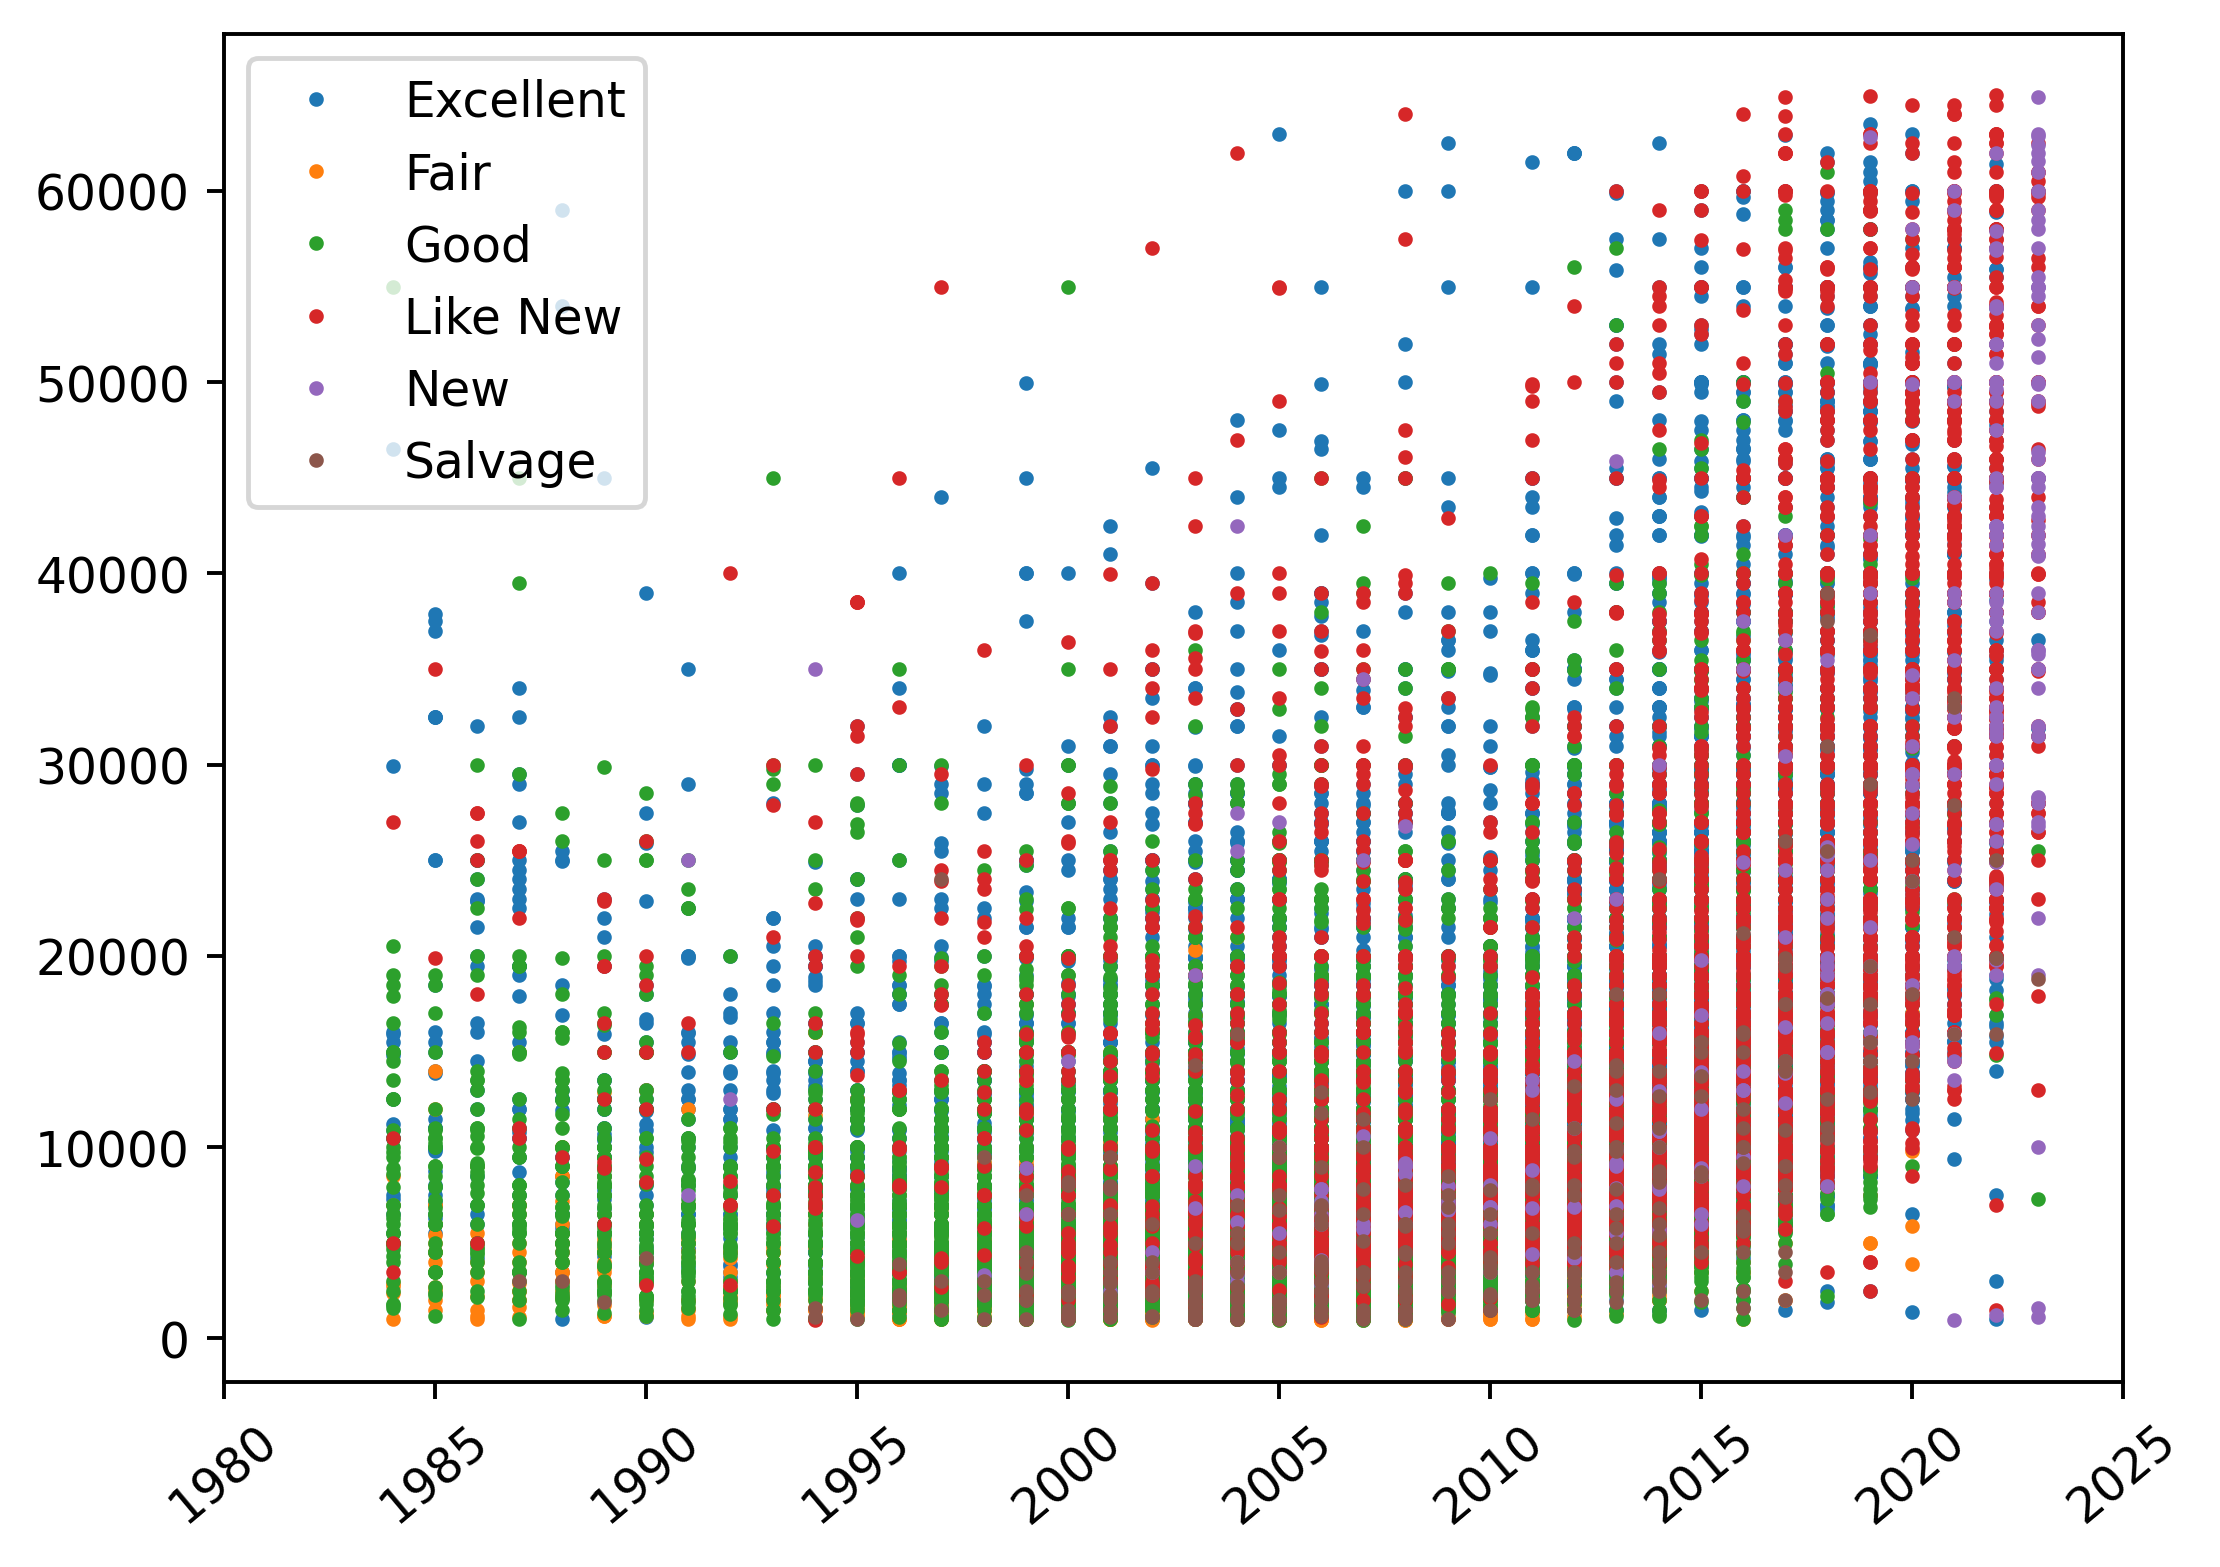

In [33]:
dft = df.groupby('Condition')
fig, ax = plt.subplots(1,1,figsize=(7,5), dpi = 350)
for name, group in dft:
     ax.plot(group.Year, group.Price, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xticks(np.arange(1980,2030,5),rotation = 40);
plt.show()
    

## Pivot Tables

In [139]:
p_table = pd.pivot_table(df_final, index=['Condition', 'Cylinders'], values = ['Price'],aggfunc = 'mean')
print(p_table)

                            Price
Condition Cylinders              
0         4.0        10286.897541
          5.0        14909.250000
          6.0        11597.749049
          8.0        17595.882051
          10.0       27200.000000
          12.0       13175.000000
1         3.0         1750.000000
          4.0         3898.074074
          5.0         4999.500000
          6.0         4564.285714
          8.0         4544.166667
          10.0        5725.000000
          12.0        4000.000000
2         3.0         6266.666667
          4.0         6791.703704
          5.0         5266.666667
          6.0         7778.291339
          8.0        10132.965854
          10.0        8275.000000
          12.0       15000.000000
3         4.0        12794.800000
          6.0        13788.080000
          8.0        18914.653061
          10.0       31000.000000
          12.0        6800.000000
4         4.0         2299.000000
          6.0        12925.000000
5         4.0 

## Normality

In [257]:
df = pd.read_csv('/Users/alex/Data_Science/Used_Cars/car_data_sorted.csv') 

In [85]:
dft['Title Status'].value_counts()

Clean         769
Rebuilt        36
Lien            9
Missing         4
Parts Only      1
Salvage         1
Name: Title Status, dtype: int64

In [130]:
li = df_final.columns.tolist()
li.remove("Price")
print(li)

None


In [230]:
columns = df_primary_makes.columns.tolist()
columns.remove("Price")
X = df_primary_makes[columns] 
y = df_primary_makes['Price'] 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

ValueError: list.remove(x): x not in list

In [314]:
features_cat = ["Make","Model","Condition", "Color", "Title Status", "Drive", "Transmission",'Fuel']
# numerical features dataframe
df_num = df.loc[:,["Year","Cylinders",'Odometer',"Price"]]
makes = df.Make.value_counts()[:14].index
#select top 14 car brands to evaluate
df_dum = df.loc[(df.Make.isin(makes))]
#select top 10 car makes out of those 
models = df_dum.Model.value_counts()[:80].index
df_dum = df_dum.loc[df_dum.Model.isin(models)]

df_dum = df_dum.loc[:,features_cat]
# Get dummies
df_dum = pd.get_dummies(df_dum)
# brand/make features dataframe
df_make = df_dum.iloc[:,np.arange(14)]
# model features dataframe
df_model = df_dum.iloc[:,np.arange(14,94)]
# condition, color, title status, drive, transmission features dataframe
df_other = df_dum.iloc[:,np.arange(94,128)]
# combined dataframes
df_make_final = pd.concat([df_make, df[['Price']]], axis = 1,sort=True)
df_model_final = pd.concat([df_model, df[['Price']]], axis = 1,sort=True)
df_other_final = pd.concat([df_other, df_num], axis = 1,sort=True)
df_dum.head()

Make_Audi  Make_Bmw  Make_Chevrolet  Make_Dodge  Make_Ford  Make_Honda  \
0          0         0               0           0          1           0   
1          0         0               0           0          0           0   
4          0         0               0           0          0           1   
6          0         0               0           0          0           1   
8          0         0               0           0          0           1   

   Make_Hyundai  Make_Jeep  Make_Lexus  Make_Mercedes  Make_Nissan  \
0             0          0           0              0            0   
1             0          0           0              0            0   
4             0          0           0              0            0   
6             0          0           0              0            0   
8             0          0           0              0            0   

   Make_Subaru  Make_Toyota  Make_Volkswagen  Model_328I  Model_4Runner  \
0            0            0                0           0              0   
1            0            1                0           0              0   
4            0            0                0           0              0   
6            0            0                0           0              0   
8            0            0                0           0              0   

   Model_535I  Model_A4  Model_A6  Model_Accord  Model_Altima  Model_Avalon  \
0           0         0         0             0             0             0   
1           0         0         0             0             0             0   
4           0         0         0             1             0             0   
6           0         0         0             0             0             0   
8           0         0         0             0             0             0   

   Model_C300  Model_Camaro  Model_Camry  Model_Charger  Model_Cherokee  \
0           0             0            0              0               0   
1           0             0            1              0               0   
4           0             0            0              0               0   
6           0             0            0              0               0   
8           0             0            0              0               0   

   Model_Civic  Model_Corolla  Model_Corvette  Model_Cr  Model_Crown  \
0            0              0               0         0            0   
1            0              0               0         0            0   
4            0              0               0         0            0   
6            0              0               0         0            0   
8            1              0               0         0            0   

   Model_Crv  Model_Durango  Model_E250  Model_E350  Model_E450  \
0          0              0           0           0           0   
1          0              0           0           0           0   
4          0              0           0           0           0   
6          0              0           0           0           0   
8          0              0           0           0           0   

   Model_Econoline  Model_Elantra  Model_Equinox  Model_Es  Model_Escape  \
0                1              0              0         0             0   
1                0              0              0         0             0   
4                0              0              0         0             0   
6                0              0              0         0             0   
8                0              0              0         0             0   

   Model_Expedition  Model_Explorer  Model_Express  Model_F150  Model_F250  \
0                 0               0              0           0           0   
1                 0               0              0           0           0   
4                 0               0              0           0           0   
6                 0               0              0           0           0   
8                 0               0              0         

In [335]:
df_other_final.drop(columns = ["Price"]).columns.shape

(37,)

### Heatmaps

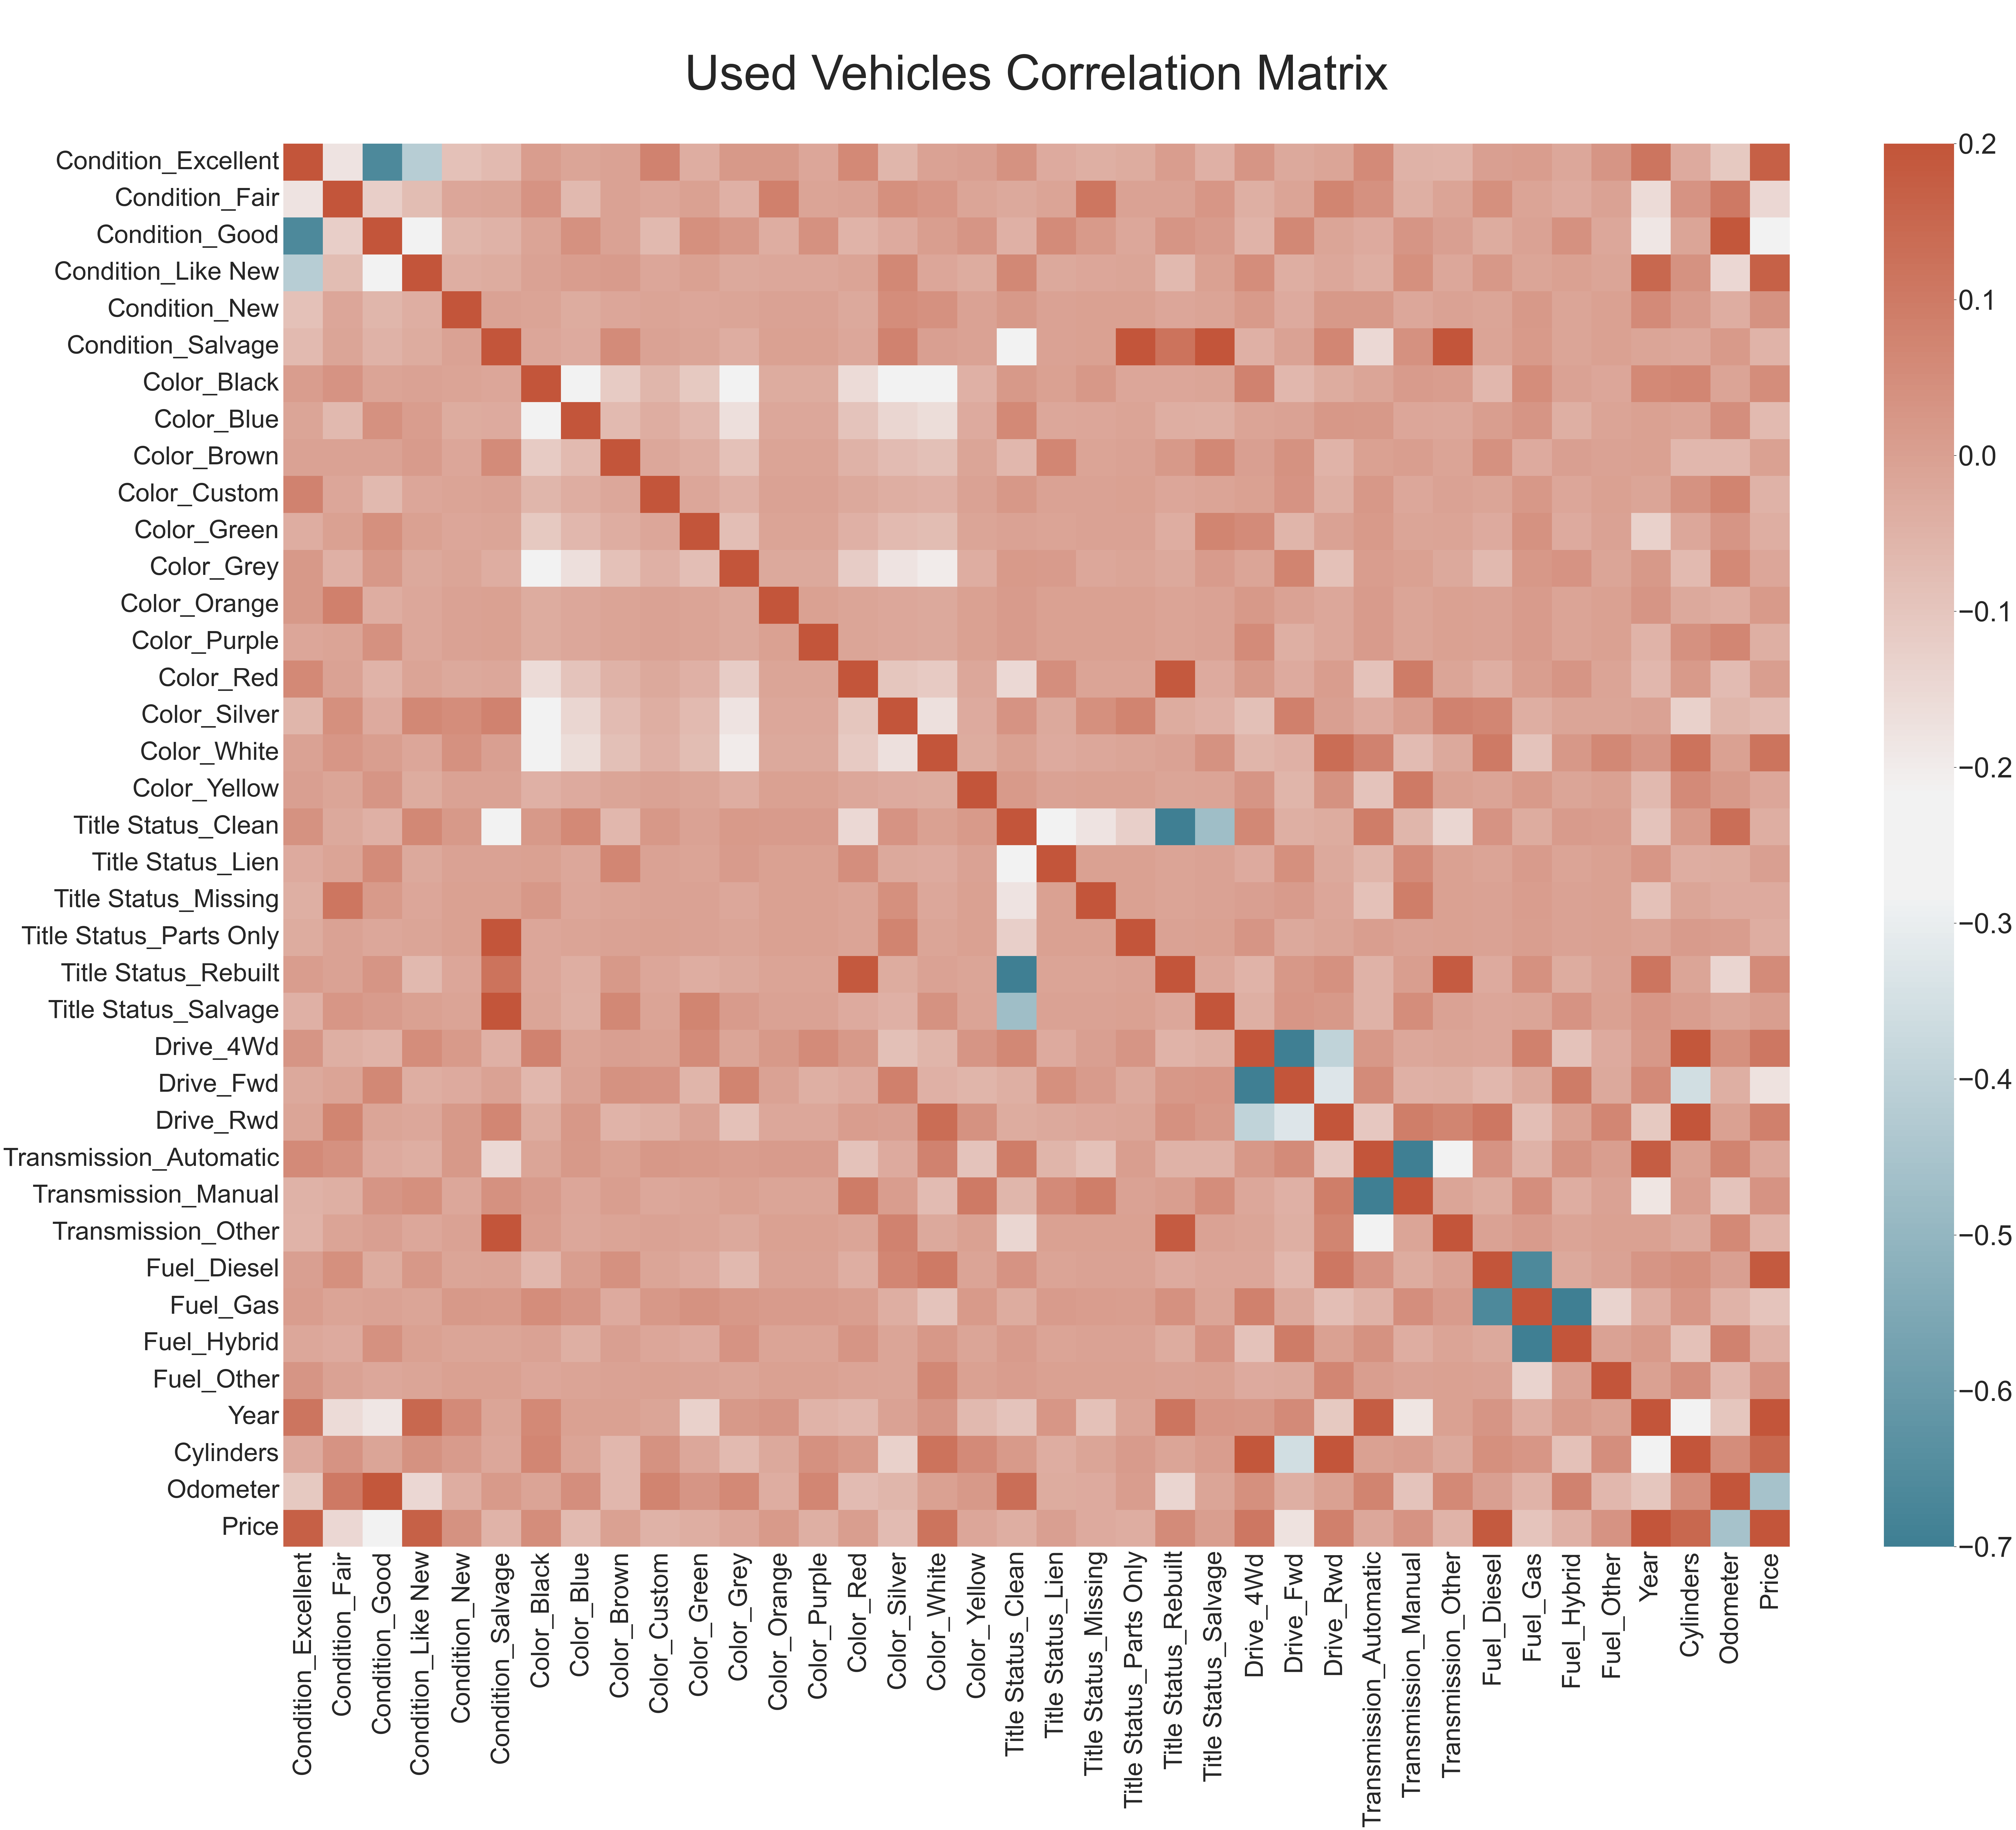

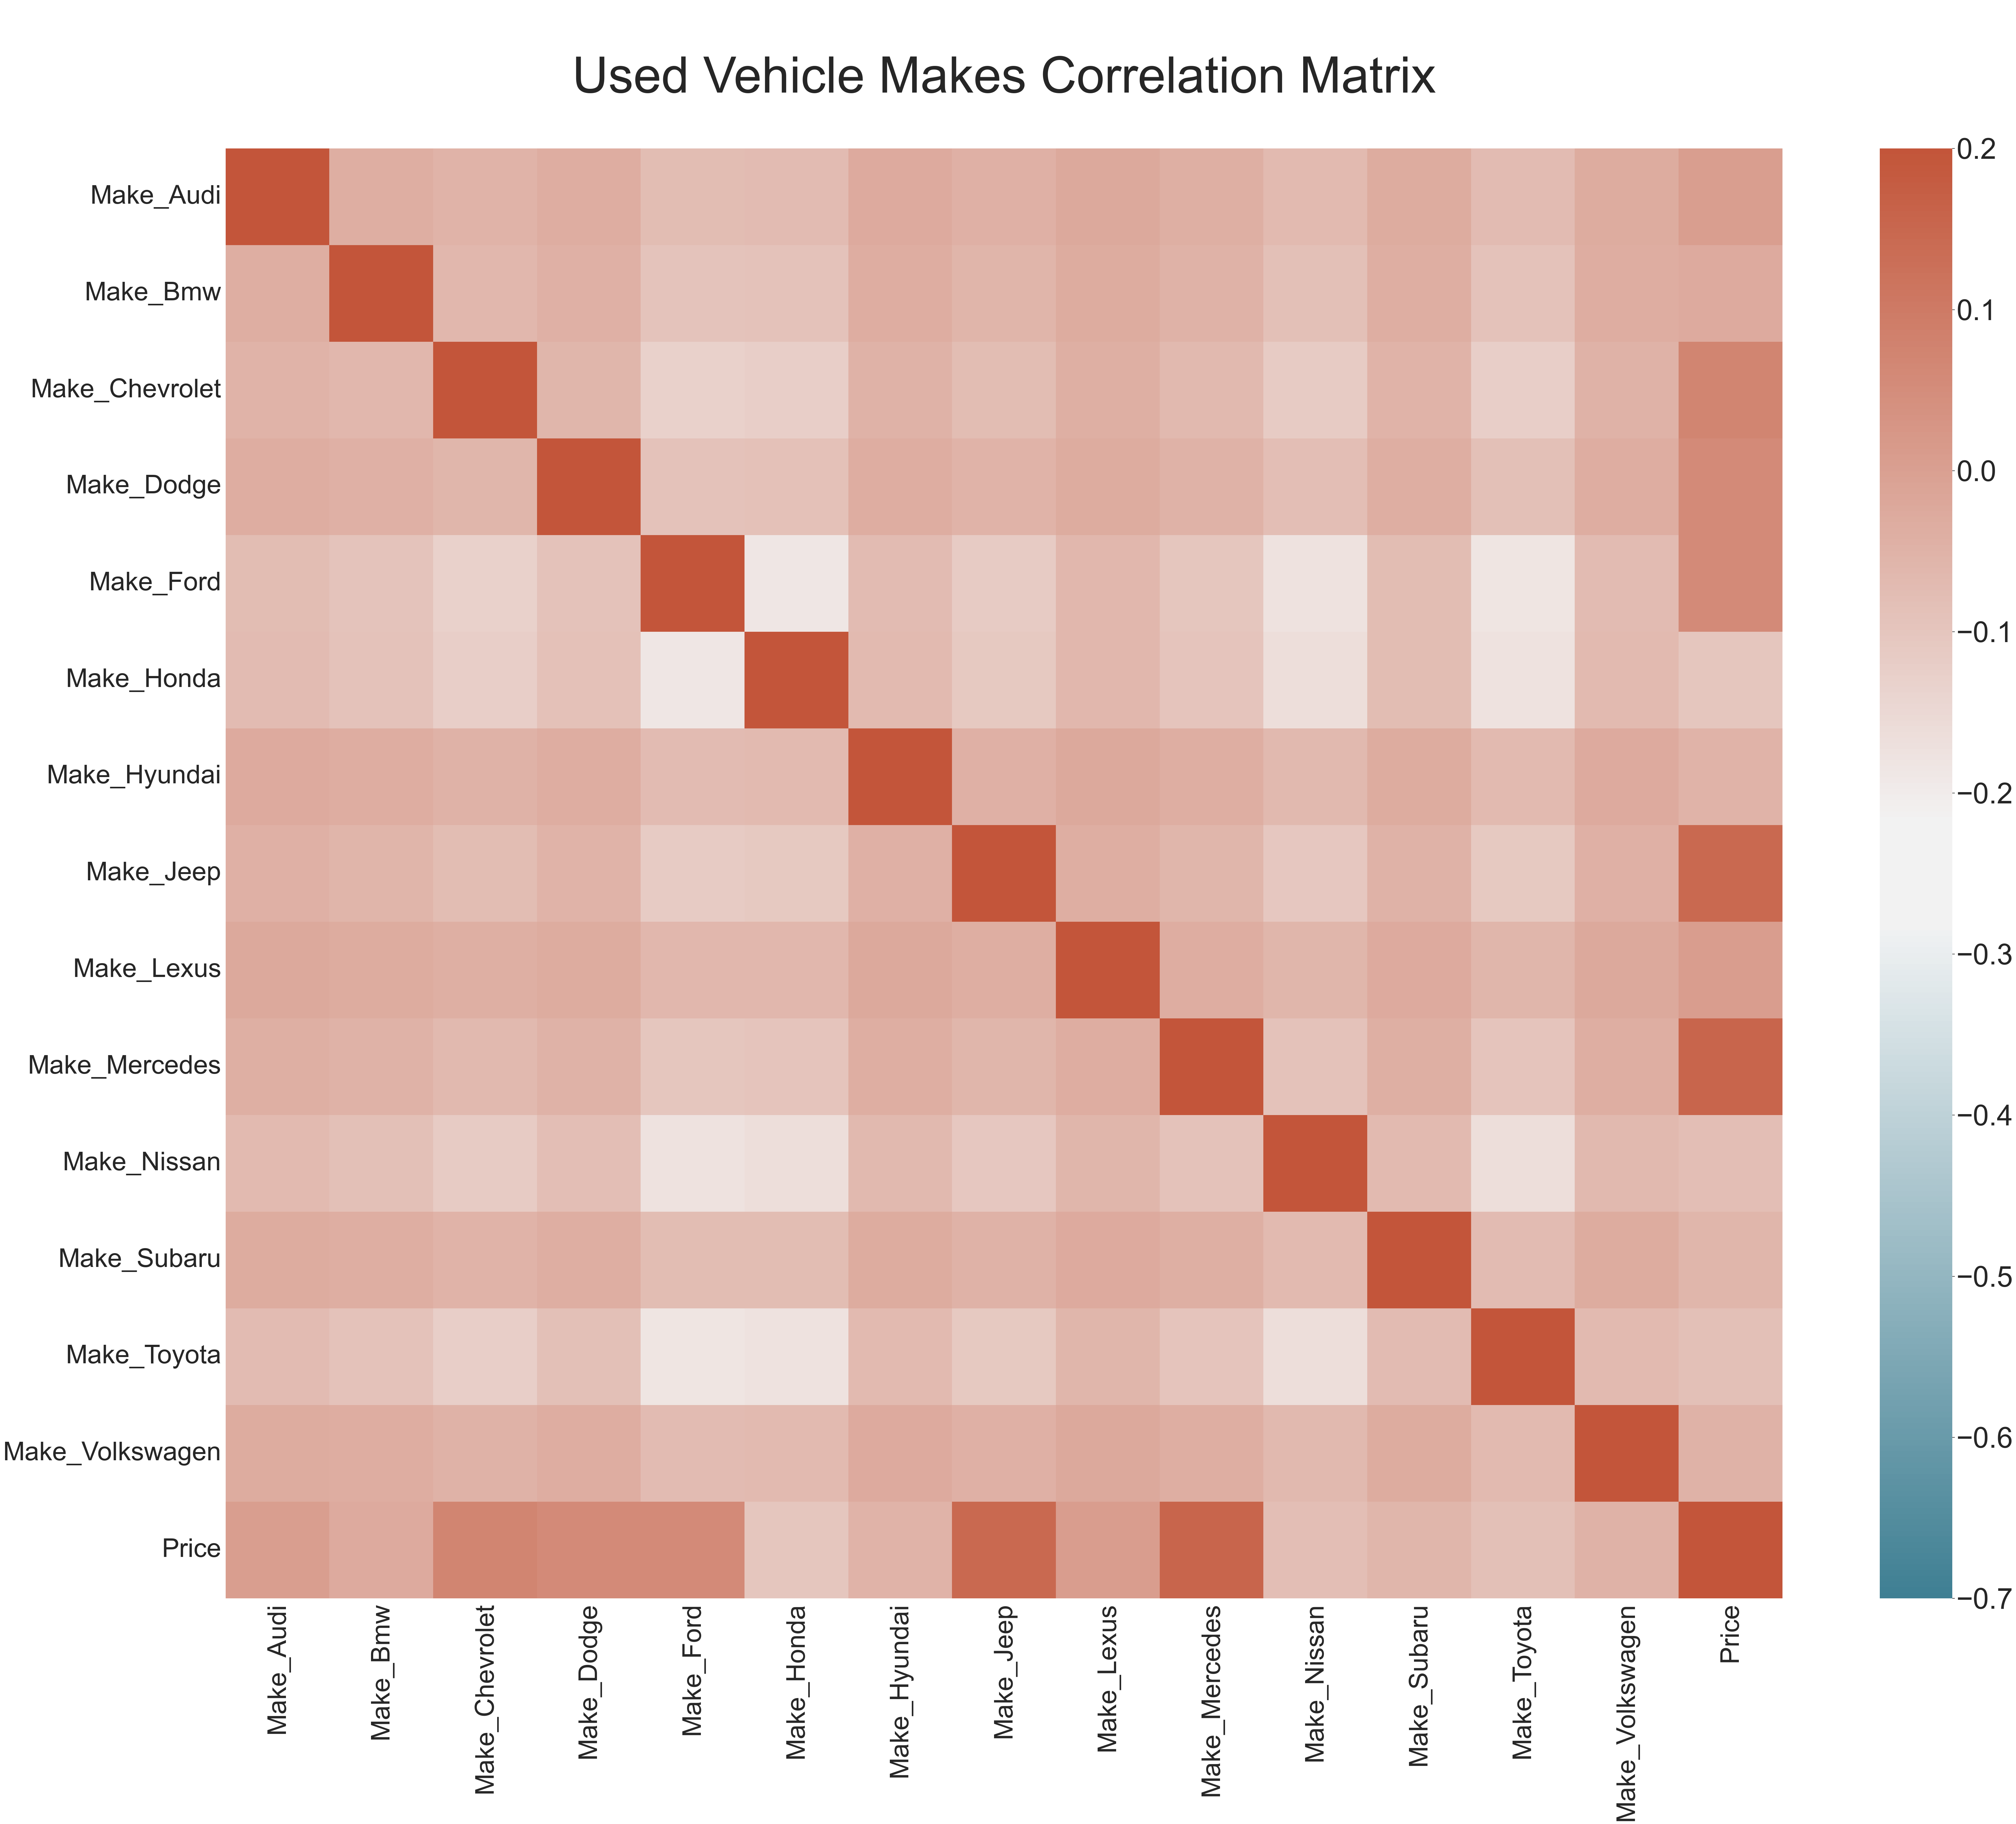

In [325]:
for dataframe, title in zip([df_other_final,df_make_final],['\nUsed Vehicles Correlation Matrix\n',\
                           '\nUsed Vehicle Makes Correlation Matrix\n']):
    plt.figure(figsize=(80, 60))
    sns.set(font_scale=6)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    corr = dataframe.corr()
    #matrix = np.triu(corr)
    fig = sns.heatmap(corr,vmin = -0.7,vmax = 0.2,annot = False,cmap=cmap)
    fig.set_title(title,fontsize = 115)
    plt.xticks(fontsize = 60)
    plt.yticks(fontsize = 60)
    plt.show()

# fig_makes = sns.heatmap(df_make_final.corr(),vmin = -0.7,vmax = 0.2,annot = False,cmap=cmap)
# fig_makes.set_title('\nUsed Vehicles Makes Correlation Matrix\n',fontsize = 115)

In [342]:
df_of = df_other_final
fig, axs = plt.subplots(40,2, figsize=(5, 5),sharey=True);
features = df_of.drop(columns = ["Price"]).columns
for i,x in enumerate(features):
    sns.regplot(x=df_of[x], y=df_of['Price'], ax=axs[i, 0]); axs[i, 0].set_xlabel(x, fontsize = 45);
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11ffdbe20> (for post_execute):


KeyboardInterrupt: 

### Scatter Plots
Shown below are relationships between numerical features ('Odometer', 'Year', and 'Cylinders') versus 'Price'

In [ ]:
df_num = df.loc[:,["Year","Cylinders",'Odometer',"Price"]]
df_cat = df_dum.loc[:, ['Drive_4Wd','Drive_Fwd','Drive_Rwd','Title Status_Clean','Title Status_Lien',\
                        'Title Status_Missing','Title Status_Parts Only','Title Status_Rebuilt','Title Status_Salvage',\
                       'Transmission_Automatic','Transmission_Manual','Transmission_Other','Fuel_Diesel','Fuel_Gas',\
                        'Fuel_Hybrid','Fuel_Other','Condition_Excellent','Condition_Fair','Condition_Good',\
                        'Condition_Like New','Condition_New','Condition_Salvage','Color_Black','Color_Blue',\
                        'Color_Brown','Color_Custom','Color_Green','Color_Grey','Color_Orange','Color_Purple',\
                        'Color_Red','Color_Silver','Color_White','Color_Yellow',]]
df_final = pd.concat([df_cat, df_num], axis = 1,sort=True)
plt.figure(figsize=(80, 60))
#(dft.drop(['Make','Model'],axis = 1)
sns.set(font_scale=6)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
fig = sns.heatmap(df_final.corr(),vmin = -0.7,vmax = 0.2,annot = False,cmap=cmap)
fig.set_title('\nUsed Vehicles Correlation Matrix\n',fontsize = 115)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
# plt.tick_params(axis='y', labelsize=60)
plt.show()

## Outliers

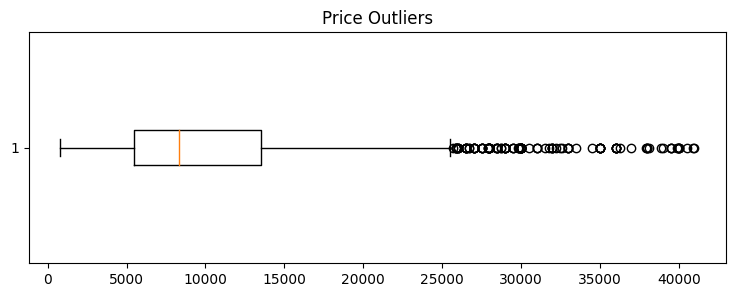

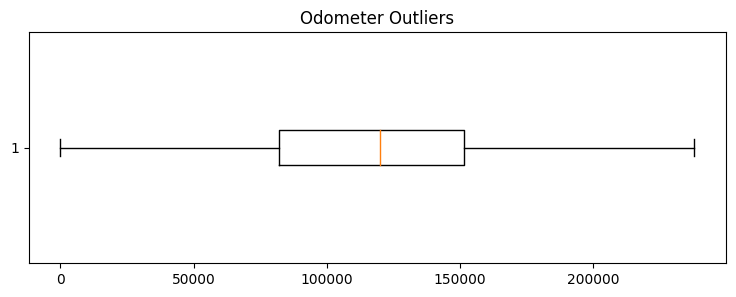

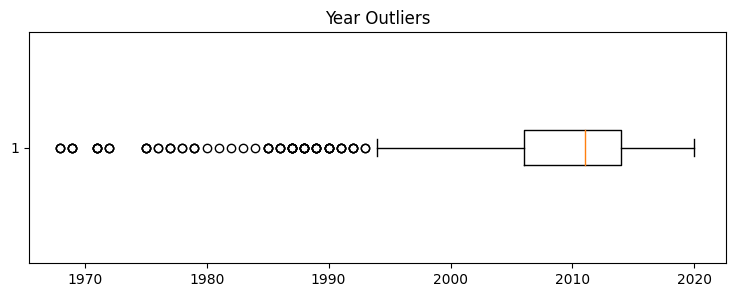

In [149]:
# check price distribution for outliers
for i in ["Price", "Odometer", "Year"]:
    fig, ax = plt.subplots(1,1,figsize=(9,3))
    boxplot = plt.boxplot(df[i], showfliers=True, vert=False)
    plt.title(i+ " Outliers", loc = 'center')

In [146]:
q_low1 = df["Price"].quantile(0.01)
q_low2  = df["Year"].quantile(0.01)
q_hi1  = df["Price"].quantile(0.97)
q_hi2  = df["Odometer"].quantile(0.97)

df1 = df[(df["Price"] < q_hi1) & (df["Price"] > q_low1) & (df["Odometer"] < q_hi2) & (df["Year"] > q_low2)]

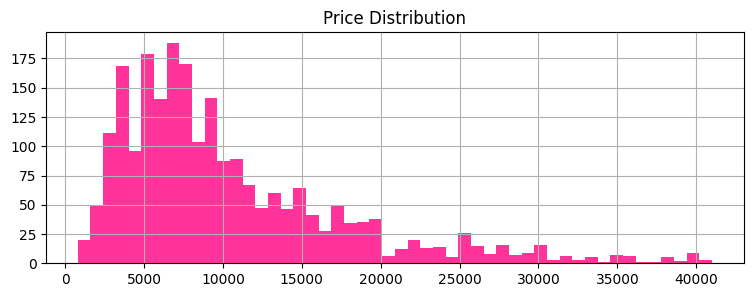

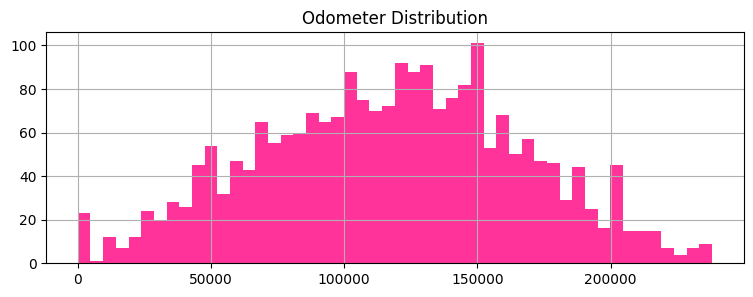

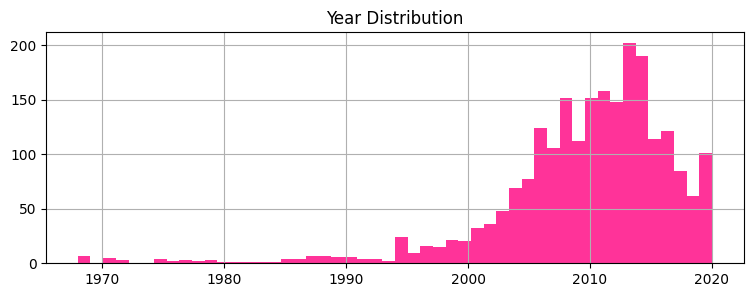

In [147]:
# a different view of the distributions
for i in ["Price", "Odometer","Year"]:
    df1[i].hist(bins=50,figsize=(9, 3),color='#FF3399');
    plt.title(i + ' Distribution', loc = 'center');
    plt.show()

We will remove the top and bottom 1% of data for Price, and top 1% for Odometer.

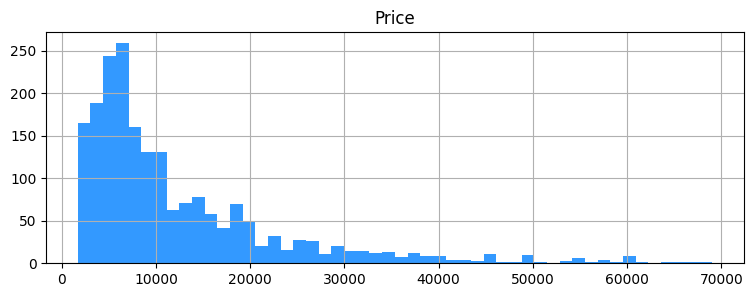

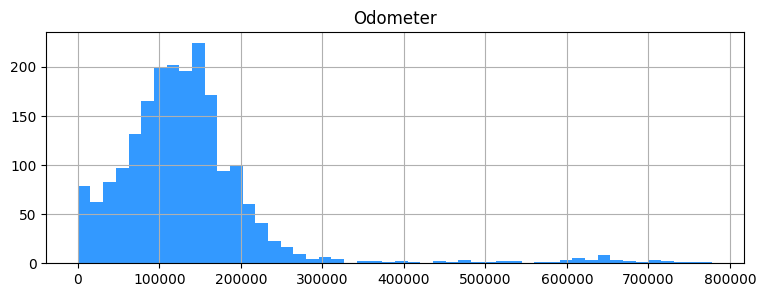

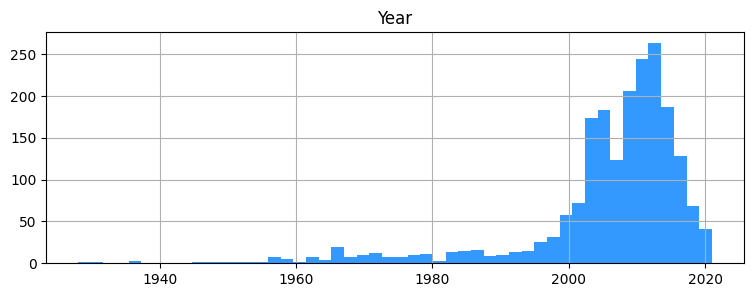

In [227]:
q_low1 = df["Price"].quantile(0.01)

# create upper price filter
q_hi1  = df["Price"].quantile(0.99)
q_hi2  = df["Odometer"].quantile(0.99)
q_hi3  = df["Year"].quantile(0.99)

# filter the data frome
df_filtered = df[(df["Price"] < q_hi1) & (df["Price"] > q_low1) & (df["Odometer"] < q_hi2) & (df["Year"] < q_hi3)]

# finally, visualize the new data with no outliers
df_filtered.hist(column='Price',bins=50,figsize=(9, 3),color='#3399ff');
df_filtered.hist(column='Odometer',bins=50,figsize=(9, 3),color='#3399ff');
df_filtered.hist(column='Year',bins=50,figsize=(9, 3),color='#3399ff');

In [ ]:
# df_cat=dfr
# # create a temporary df with the encoded numerical columns
# temp = df_cat[[ 'condition', 'cylinders', 'drive', 'fuel',
#        'paint color', 'size', 'title status', 'transmission', 'type', 'make']]\
#         .apply(lambda col:pd.Categorical(col).codes)
# # concatenate the temp columns to the old dframe
# df_cat = pd.concat([df_cat, temp],axis=1)
# print(df_cat.shape, dfr.shape)
# # df_cat.columns

# # Rename duplicate columns
# from collections import defaultdict
# renamer = defaultdict()
# for column_name in df_cat.columns[df_cat.columns.duplicated(keep=False)].tolist():
#     if column_name not in renamer:
#         renamer[column_name] = [column_name+'_0']
#     else:
#         renamer[column_name].append(column_name +'_'+str(len(renamer[column_name])))

# defaultdict(None, {'b': ['b_0', 'b_1', 'b_2', 'b_3'], 'c': ['c_0', 'c_1']})

# df_cat.rename(
#     columns=lambda column_name: renamer[column_name].pop(0)
#     if column_name in renamer 
#     else column_name , inplace=True)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
# plot histogram
fig = ax.hist(df['year'],rwidth=0.7,bins=35)
# set title and labels
fig = ax.set_title('Craigslist Used Vehicles (Model Year)')
fig = ax.set_xlabel('Year')
fig = ax.set_ylabel('Frequency')

In [132]:
labels = []
values = []
for i in df[df.Make != 0]['Make'].value_counts().values[:20]:
    values.append(i)
for i in df[df.Make != 0]['Make'].value_counts().index[:20]:
    labels.append(i)
    

AttributeError: 'BarContainer' object has no attribute 'annotate'

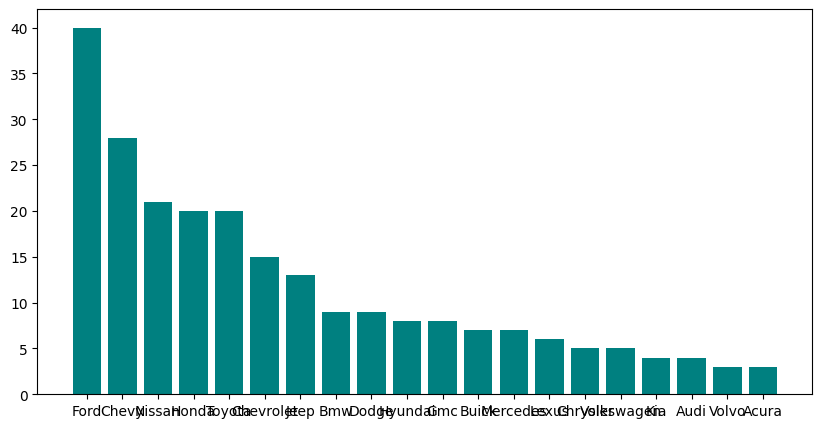

In [143]:
plt.figure(figsize = [10,5])
ax = plt.bar(labels, values, color = 'teal')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# features we are keeping for the model:
to_keep = ['Year', 'Make', 'Model', 'Price', 'Condition', 'Odometer','Paint Color','Title Status','Drive','Transmission']
# create a new dataframe (df, transformed) with just those features:
dft = df[to_keep]
# features that are categorical: 
features = ["Make","Model","Condition", "Paint Color", "Title Status", "Drive", "Transmission"]

cat_variables = dft[features]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
dft = dft.drop(features, axis=1)
dft = pd.concat([dft, cat_dummies], axis=1)

scaler = MinMaxScaler()
dft = pd.DataFrame(scaler.fit_transform(dft), columns = dft.columns)

imputer = KNNImputer(n_neighbors=5)
dft = pd.DataFrame(imputer.fit_transform(dft),columns = dft.columns)
